In [432]:
# libraries used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objs as go
import plotly.offline as py

from wordcloud import WordCloud

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# Data Cleaning

Before I begin creating the visuals that will aid my project, I am first going to clean all of my datasets and make sure each of them are clean, easy to understand, and ready to be used. I will be going through each dataset one by one to avoid confusion. 


### The Best New Artist Grammy Winners List 

**Reading the dataset**

In [2]:
best_new = pd.read_csv('best_new2.csv')
best_new_df = pd.DataFrame(best_new)
best_new_df.head()

,award_date,artist
0,"February 27, 1980",Rickie Lee Jones
1,"February 25, 1981",Christopher Cross
2,"February 24, 1982",Sheena Easton
3,"February 23, 1983",Men At Work
4,"February 28, 1984",Culture


In [3]:
# checking dimension of the dataset
best_new_df.shape

(43, 2)

In [4]:
# will be focusing on artists starting from 1985

# dropping the first five columns (1980-1984 winners)
best_new_df = best_new_df.drop(best_new_df.index[:5])

**Checking the Data Types**

In [5]:
best_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 5 to 42
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   award_date  38 non-null     object
 1   artist      38 non-null     object
dtypes: object(2)
memory usage: 740.0+ bytes


The "award_date" column is labeled as an object, let's change this to a date/time data type. 

In [6]:
best_new_df['award_date'] = pd.to_datetime(best_new_df['award_date'])

best_new_df.head()

,award_date,artist
5,1985-02-26,Cyndi Lauper
6,1986-02-25,Sade
7,1987-02-24,Bruce Hornsby & The Range
8,1988-03-02,Jody Watley
9,1989-02-22,Tracy Chapman


In [7]:
# checking the data types again 
best_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 5 to 42
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   award_date  38 non-null     datetime64[ns]
 1   artist      38 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 740.0+ bytes


In [8]:
# checking for missing values
best_new_df.isna().sum()

award_date    0
artist        0
dtype: int64

These columns in the dataset now have the nessecary data types and do not have missing values.

### The Billboard Hot 100s Chart Data Cleanup 

**Reading the data**

In [9]:
hot100_read = pd.read_csv('chart_data.csv')

hot100_df = pd.DataFrame(hot100_read)

hot100_df.head()

,week_of,rank,song_title,artist_name,peak_position
0,2024-02-03,1,Lovin On Me,Jack Harlow,1
1,2024-02-03,2,Cruel Summer,Taylor Swift,3
2,2024-02-03,3,Greedy,Tate McRae,4
3,2024-02-03,4,Lose Control,Teddy Swims,8
4,2024-02-03,5,I Remember Everything,Zach Bryan Featuring Kacey Musgraves,6


In [10]:
# checking dimension of df

hot100_df.shape

(200000, 5)

In [11]:
# dropping peak position

hot100_df = hot100_df.drop('peak_position', axis = 'columns')

**Why did I drop this column?**

Of the bat, I decided to remove the peak postion column as I will not be using this column in any of my future modeling or visualizations. Furthermore, I can easily find the highest chart postion a song or artist received by using the rank column.

In [12]:
#checking the new dataset
hot100_df.head()

,week_of,rank,song_title,artist_name
0,2024-02-03,1,Lovin On Me,Jack Harlow
1,2024-02-03,2,Cruel Summer,Taylor Swift
2,2024-02-03,3,Greedy,Tate McRae
3,2024-02-03,4,Lose Control,Teddy Swims
4,2024-02-03,5,I Remember Everything,Zach Bryan Featuring Kacey Musgraves


**Checking the Data Types of the dataset**

In [13]:
hot100_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   week_of      200000 non-null  object
 1   rank         200000 non-null  int64 
 2   song_title   200000 non-null  object
 3   artist_name  200000 non-null  object
dtypes: int64(1), object(3)
memory usage: 6.1+ MB


The "week_of" column is labeled as an object data type. Below I will go ahead and change this to a date/time data type. 

In [14]:
# adjusting the data type of the week_of column

hot100_df['week_of'] = pd.to_datetime(hot100_df['week_of'])

hot100_df.head()

,week_of,rank,song_title,artist_name
0,2024-02-03,1,Lovin On Me,Jack Harlow
1,2024-02-03,2,Cruel Summer,Taylor Swift
2,2024-02-03,3,Greedy,Tate McRae
3,2024-02-03,4,Lose Control,Teddy Swims
4,2024-02-03,5,I Remember Everything,Zach Bryan Featuring Kacey Musgraves


In [15]:
# Checking the data types again
hot100_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   week_of      200000 non-null  datetime64[ns]
 1   rank         200000 non-null  int64         
 2   song_title   200000 non-null  object        
 3   artist_name  200000 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 6.1+ MB


Now all of the columns have the necessary data types. Furthermore, the .info() function also tells me that there are no missing values in this dataset. Below I will further ensure this fact. 

In [16]:
# Checking the number of missing values
hot100_df.isna().sum()

week_of        0
rank           0
song_title     0
artist_name    0
dtype: int64

No mising values in this dataset!

## Splitting the columns 

Songs may feature one or many artists, which is addressed in different ways in the a song's title and credits. Since I will be directly dealing with the songs on the Billboard Hot 100 Charts, I want to analyze each artist involved in making the song. This is because I will be looking for the number of singles each artist in the "best_new" dataset has had on the charts throughout the years. To do this, I have to split the artist_name column into separate columns, as multiple song artists may be listed in a single column, thus being regarded as a single entity. I will split this column into several featured_artists columns. 


In [17]:
# creating a copy of the original hot 100s dataset
hot100_split = hot100_df

### First Split

The first split I will do is going to simply separate the artists listed before the word (and its variations) "featuring". 

In [18]:
# START CITATION 

# links below were used to help me with the regular expressions

# https://saturncloud.io/blog/how-to-split-pandas-dataframe-column-values-in-python/#:~:text=Splitting%20Pandas%20dataframe%20column%20values%20can%20be%20done%20using%20the,string%2C%20or%20a%20regular%20expression.
# https://note.nkmk.me/en/python-split-rsplit-splitlines-re/
# https://www.dataquest.io/blog/regex-cheatsheet/


In [19]:
# spliting the column
# creating a separate df to house the separated columns
# the delimiter in this case are all variations of 'featuring'
hot100_split[['main_artist', 'featured_artists']] = hot100_split['artist_name'].str.split(r'\s+(?:Featuring|feat|ft|Feat|Ft|featuring)\s+', 
                                                      n = 1, 
                                                      expand = True)

hot100_split.head()

,week_of,rank,song_title,artist_name,main_artist,featured_artists
0,2024-02-03,1,Lovin On Me,Jack Harlow,Jack Harlow,None
1,2024-02-03,2,Cruel Summer,Taylor Swift,Taylor Swift,None
2,2024-02-03,3,Greedy,Tate McRae,Tate McRae,None
3,2024-02-03,4,Lose Control,Teddy Swims,Teddy Swims,None
4,2024-02-03,5,I Remember Everything,Zach Bryan Featuring Kacey Musgraves,Zach Bryan,Kacey Musgraves


In [20]:
# END CITATION 

### Second Split 

Investigating this dataset made me recall the fact that some songs may have various main artists. Songs with two or more artists do not always label the other artists as features. There are cases where the artists may have equally collaborated/worked on or both have equal strength on a song. In these cases, these songs may list more than one artist as a main artist of a song, rather than a featured artist of a song. Before continuing to separate the featured artists column, I will go ahead and split the main_artist column (using "and" variations) to ensure that the different artists are represented individually. 

However, I do have to be aware that three of the artists in the best_new data include "&" in their band/group names. These artists include: Bruce Hornsby & The Range, Hootie & The Blowfish, and Macklemore & Ryan Lewis. When creating the separator pattern variable, I will ensure to include the exceptions of these instances in order to avoid spliting these bands into unnecassary entities.  

In [21]:
# START CITATION 

# links below were used to help me with the regular expressions

# https://saturncloud.io/blog/how-to-split-pandas-dataframe-column-values-in-python/#:~:text=Splitting%20Pandas%20dataframe%20column%20values%20can%20be%20done%20using%20the,string%2C%20or%20a%20regular%20expression.
# https://note.nkmk.me/en/python-split-rsplit-splitlines-re/
# https://www.dataquest.io/blog/regex-cheatsheet/

In [22]:
# splitting the 'main_artist' column based on the regular expression pattern 

split_main_artists = hot100_split['main_artist'].str.split(r'(?i)\s+(?:&(?! The Range| The Blowfish| Ryan Lewis)|and(?! The Range| The Blowfish| Ryan Lewis))\s+', expand = True)

# renaming the split columns

# creating empty lists to hold the column names for the split columns
col_headers = []

# iterating through the split columns
for i in range(split_main_artists.shape[1]): 
    
    # creating header
    header = f'main_artist_{i + 1}'
    
    #appending to empty list
    col_headers.append(header)

# assignign the new column headers to the split main artists df 
split_main_artists.columns = col_headers

# concatenating the split columns with the original DataFrame
# creating a new df to avoid confusion and record each change made
hot100_split2 = pd.concat([hot100_split, split_main_artists], axis = 1)

hot100_split2.head()

,week_of,rank,song_title,artist_name,main_artist,featured_artists,main_artist_1,main_artist_2,main_artist_3
0,2024-02-03,1,Lovin On Me,Jack Harlow,Jack Harlow,None,Jack Harlow,None,None
1,2024-02-03,2,Cruel Summer,Taylor Swift,Taylor Swift,None,Taylor Swift,None,None
2,2024-02-03,3,Greedy,Tate McRae,Tate McRae,None,Tate McRae,None,None
3,2024-02-03,4,Lose Control,Teddy Swims,Teddy Swims,None,Teddy Swims,None,None
4,2024-02-03,5,I Remember Everything,Zach Bryan Featuring Kacey Musgraves,Zach Bryan,Kacey Musgraves,Zach Bryan,None,None


In [23]:
# END CITATION 

Going ahead and dropping the 'artist_name' and 'main_artist'column as that is no longer needed. I am also going to reorder the columns for easier understanding. This will also help for the next split.  

In [24]:
# START CITATION 

# link/s below were used to help me generate the following code (reordering columns)

# https://www.geeksforgeeks.org/change-the-order-of-a-pandas-dataframe-columns-in-python/

In [25]:
# dropping artist_name and main_artist columns
hot100_split2 = hot100_split2.drop(['artist_name', 'main_artist'], axis = 1)

# reordering the columns
hot100_split2 = hot100_split2.iloc[:, [0,1,2,4,5,6,3]]

hot100_split2.head()

,week_of,rank,song_title,main_artist_1,main_artist_2,main_artist_3,featured_artists
0,2024-02-03,1,Lovin On Me,Jack Harlow,None,None,None
1,2024-02-03,2,Cruel Summer,Taylor Swift,None,None,None
2,2024-02-03,3,Greedy,Tate McRae,None,None,None
3,2024-02-03,4,Lose Control,Teddy Swims,None,None,None
4,2024-02-03,5,I Remember Everything,Zach Bryan,None,None,Kacey Musgraves


In [26]:
# END CITATION 

### Third Split

Now I want to focus on splitting the featured_artists column. This is because their are many instances where there are more than one artist featured in a song, so I just want to ensure that each featured artist is seperated into their own column. However I will do this in two steps. Why?

Below are examples of how the featured artists are listed in this column: 

'main artist' feat. :

    - artist 1, artist 2, artist 3 & artist 4
    - artist 1 & artist 2

**Step 1**: I am first going to seperate the entities before and after the "and" variations. This will ensure that the artist after the "and" is successfully seperated. 

**Step 2**: After completing step one, I will then go ahead and seperate all of the artists seperated by the commas. 

This will successfully split all of the featured artists in an organized and systematic way. 

In [27]:
# START CITATION 

# links below were used to help me generate the following code (splitting columns, regular expressions)

# https://saturncloud.io/blog/how-to-split-pandas-dataframe-column-values-in-python/#:~:text=Splitting%20Pandas%20dataframe%20column%20values%20can%20be%20done%20using%20the,string%2C%20or%20a%20regular%20expression.
# https://note.nkmk.me/en/python-split-rsplit-splitlines-re/
# https://www.dataquest.io/blog/regex-cheatsheet/

In [28]:
# splitting the featured_artists column based on regular expression pattern 
split_artists = hot100_split2['featured_artists'].str.split(r'\s+(?:&|and|And|,)\s+', expand = True)

# renaming the split columns

# creating empty lists to hold the column names for the split columns
col_headers = []

# iterating through the split columns
for i in range(split_artists.shape[1]): 
    
    # creating header
    header = f'featured_artist_{i + 1}'
    
    #appending to empty list
    col_headers.append(header)

# assigning the new column headers to the split main artists df 
split_artists.columns = col_headers

# concatenating the split columns with the previous split dataset 
# creating a new df to avoid confusion and record each change made
hot100_split3 = pd.concat([hot100_split2, split_artists], axis = 1)

hot100_split3.head()

,week_of,rank,song_title,main_artist_1,main_artist_2,main_artist_3,featured_artists,featured_artist_1,featured_artist_2,featured_artist_3
0,2024-02-03,1,Lovin On Me,Jack Harlow,None,None,None,None,None,None
1,2024-02-03,2,Cruel Summer,Taylor Swift,None,None,None,None,None,None
2,2024-02-03,3,Greedy,Tate McRae,None,None,None,None,None,None
3,2024-02-03,4,Lose Control,Teddy Swims,None,None,None,None,None,None
4,2024-02-03,5,I Remember Everything,Zach Bryan,None,None,Kacey Musgraves,Kacey Musgraves,None,None


In [29]:
# END CITATION 

Now I can go ahead and drop the featured_artists column as it will no longer be used. 

In [30]:
#dropping the featured artist column 
hot100_split3 = hot100_split3.drop(['featured_artists'], axis = 1)

In [31]:
hot100_split3.head()

,week_of,rank,song_title,main_artist_1,main_artist_2,main_artist_3,featured_artist_1,featured_artist_2,featured_artist_3
0,2024-02-03,1,Lovin On Me,Jack Harlow,None,None,None,None,None
1,2024-02-03,2,Cruel Summer,Taylor Swift,None,None,None,None,None
2,2024-02-03,3,Greedy,Tate McRae,None,None,None,None,None
3,2024-02-03,4,Lose Control,Teddy Swims,None,None,None,None,None
4,2024-02-03,5,I Remember Everything,Zach Bryan,None,None,Kacey Musgraves,None,None


In [32]:
# START CITATION 

# links below were used to help me generate the following code (splitting columns, regular expressions)

# https://saturncloud.io/blog/how-to-split-pandas-dataframe-column-values-in-python/#:~:text=Splitting%20Pandas%20dataframe%20column%20values%20can%20be%20done%20using%20the,string%2C%20or%20a%20regular%20expression.


### Fourth (last) Split

In [33]:
# splitting the featured_artist_1 column based on the comma separator
split_feats = hot100_split3['featured_artist_1'].str.split(',', expand = True)

# renaming the split columns

# creating empty lists to hold the column names for the split columns
col_headers = []

# iterating through the split columns
for i in range(split_feats.shape[1]): 
    
    # creating header 
    # note that since we already have the first 3 featured artists, the headers be feat_artist number 4 and on
    header = f'featured_artist_{i + 4}'
    
    #appending to empty list
    col_headers.append(header)

# assigning the new column headers to the split main artists df 
split_feats.columns = col_headers


# concatenating the split columns with the previous split dataset
# creating a new df to avoid confusion and record each change made
hot100_split4 = pd.concat([hot100_split3, split_feats], axis = 1)

hot100_split4.head()

,week_of,rank,song_title,main_artist_1,main_artist_2,main_artist_3,featured_artist_1,featured_artist_2,featured_artist_3,featured_artist_4,featured_artist_5,featured_artist_6,featured_artist_7,featured_artist_8,featured_artist_9,featured_artist_10,featured_artist_11
0,2024-02-03,1,Lovin On Me,Jack Harlow,None,None,None,None,None,None,None,None,None,None,None,None,None
1,2024-02-03,2,Cruel Summer,Taylor Swift,None,None,None,None,None,None,None,None,None,None,None,None,None
2,2024-02-03,3,Greedy,Tate McRae,None,None,None,None,None,None,None,None,None,None,None,None,None
3,2024-02-03,4,Lose Control,Teddy Swims,None,None,None,None,None,None,None,None,None,None,None,None,None
4,2024-02-03,5,I Remember Everything,Zach Bryan,None,None,Kacey Musgraves,None,None,Kacey Musgraves,None,None,None,None,None,None,None


In [34]:
# END CITATION

The "featured_artist_1" and "featured_artist_4" columns are the same columns, therefore I will drop the "featured_artist_1" column to avoid redundancy.

In [35]:
# dropping the featured_artist_1 column
hot100_split4 = hot100_split4.drop('featured_artist_1', axis = 'columns')

hot100_split4.head()

,week_of,rank,song_title,main_artist_1,main_artist_2,main_artist_3,featured_artist_2,featured_artist_3,featured_artist_4,featured_artist_5,featured_artist_6,featured_artist_7,featured_artist_8,featured_artist_9,featured_artist_10,featured_artist_11
0,2024-02-03,1,Lovin On Me,Jack Harlow,None,None,None,None,None,None,None,None,None,None,None,None
1,2024-02-03,2,Cruel Summer,Taylor Swift,None,None,None,None,None,None,None,None,None,None,None,None
2,2024-02-03,3,Greedy,Tate McRae,None,None,None,None,None,None,None,None,None,None,None,None
3,2024-02-03,4,Lose Control,Teddy Swims,None,None,None,None,None,None,None,None,None,None,None,None
4,2024-02-03,5,I Remember Everything,Zach Bryan,None,None,None,None,Kacey Musgraves,None,None,None,None,None,None,None


Below I reordered the columns in order to arrange them in a logical manner, as well as rename some of the columns to more descriptive names. 

In [36]:
# START CITATION 

# link/s below were used to help me generate the following code (reordering columns)

# https://www.geeksforgeeks.org/change-the-order-of-a-pandas-dataframe-columns-in-python/

In [37]:
# reordering the columns for easier readability
hot100_split4 = hot100_split4.iloc[:, [0,1,2,3,
                                       4,5,8,9,
                                       10,11,6,7,
                                       12,13,14,15]]

# renaming column headers
hot100_split4.columns = ['chart_week', 'rank', 'song_title', 'main_artist_1', 'main_artist_2', 'main_artist_3',
                       'featured_artist_1', 'featured_artist_2', 'featured_artist_3', 'featured_artist_4', 
                        'featured_artist_5', 'featured_artist_6', 'featured_artist_7', 'featured_artist_8',
                       'featured_artist_9', 'featured_artist_10']

hot100_split4.head()

,chart_week,rank,song_title,main_artist_1,main_artist_2,main_artist_3,featured_artist_1,featured_artist_2,featured_artist_3,featured_artist_4,featured_artist_5,featured_artist_6,featured_artist_7,featured_artist_8,featured_artist_9,featured_artist_10
0,2024-02-03,1,Lovin On Me,Jack Harlow,None,None,None,None,None,None,None,None,None,None,None,None
1,2024-02-03,2,Cruel Summer,Taylor Swift,None,None,None,None,None,None,None,None,None,None,None,None
2,2024-02-03,3,Greedy,Tate McRae,None,None,None,None,None,None,None,None,None,None,None,None
3,2024-02-03,4,Lose Control,Teddy Swims,None,None,None,None,None,None,None,None,None,None,None,None
4,2024-02-03,5,I Remember Everything,Zach Bryan,None,None,Kacey Musgraves,None,None,None,None,None,None,None,None,None


In [38]:
# END CITATION 

After looking through the dataset, I realized there are some instances of the values having a leading white space. This could cause many issues and misinformation in future models and visualizations. I will go ahead and rectify this issue.

In [39]:
# applying the strip() function to values from the third column to the last column
for col in hot100_split4.iloc[:, 2:]:
    hot100_split4[col] = hot100_split4[col].str.strip()

In [40]:
hot100_split4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   chart_week          200000 non-null  datetime64[ns]
 1   rank                200000 non-null  int64         
 2   song_title          200000 non-null  object        
 3   main_artist_1       200000 non-null  object        
 4   main_artist_2       12370 non-null   object        
 5   main_artist_3       159 non-null     object        
 6   featured_artist_1   31787 non-null   object        
 7   featured_artist_2   1476 non-null    object        
 8   featured_artist_3   540 non-null     object        
 9   featured_artist_4   148 non-null     object        
 10  featured_artist_5   6329 non-null    object        
 11  featured_artist_6   30 non-null      object        
 12  featured_artist_7   87 non-null      object        
 13  featured_artist_8   16 non-nu

All of the data types are correct for this dataset. 

### New Dataset 

Now that I finished splitting the artists in the Billboard Hot 100 dataset, I will use the final split dataset to to create a filtered dataset that only displays the instances where each of the artists in the "best_new" dataset are on the charts. This will be the dataset I will utilize from here on out, as I am focusing my analysis on those speciic artists. 

To do this, I will scan through each main artist/featured artist column on the dataset in order to find these artists.

In [41]:
# START CITATION 

# link/s below were used to help me generate the following code (selecting based on multiple conditions)

# https://note.nkmk.me/en/python-pandas-multiple-conditions/

In [42]:
# Best New Award Winners
selected_artists = best_new_df['artist'].unique()

# Filtering the hot100_split4 DataFrame to include rows where any of the selected artists appear
filtered_hot100 = hot100_split4[
    (hot100_split4['main_artist_1'].isin(selected_artists)) |
    (hot100_split4['main_artist_2'].isin(selected_artists)) |
    (hot100_split4['main_artist_3'].isin(selected_artists)) |
    (hot100_split4['featured_artist_1'].isin(selected_artists)) |
    (hot100_split4['featured_artist_2'].isin(selected_artists)) |
    (hot100_split4['featured_artist_3'].isin(selected_artists)) |
    (hot100_split4['featured_artist_4'].isin(selected_artists)) |
    (hot100_split4['featured_artist_5'].isin(selected_artists)) |
    (hot100_split4['featured_artist_6'].isin(selected_artists)) |
    (hot100_split4['featured_artist_7'].isin(selected_artists)) |
    (hot100_split4['featured_artist_8'].isin(selected_artists)) |
    (hot100_split4['featured_artist_9'].isin(selected_artists)) |
    (hot100_split4['featured_artist_10'].isin(selected_artists))
]

filtered_hot100.head()

,chart_week,rank,song_title,main_artist_1,main_artist_2,main_artist_3,featured_artist_1,featured_artist_2,featured_artist_3,featured_artist_4,featured_artist_5,featured_artist_6,featured_artist_7,featured_artist_8,featured_artist_9,featured_artist_10
22,2024-02-03,23,What Was I Made For?,Billie Eilish,None,None,None,None,None,None,None,None,None,None,None,None
24,2024-02-03,25,Houdini,Dua Lipa,None,None,None,None,None,None,None,None,None,None,None,None
35,2024-02-03,36,Dance The Night,Dua Lipa,None,None,None,None,None,None,None,None,None,None,None,None
37,2024-02-03,38,Vampire,Olivia Rodrigo,None,None,None,None,None,None,None,None,None,None,None,None
53,2024-02-03,54,Get Him Back!,Olivia Rodrigo,None,None,None,None,None,None,None,None,None,None,None,None


In [43]:
# END CITATION

### Shrinking the dataset 

There are a lot of missing values in the filter_hot100 dataset. The reason for this is that some songs have more artists on a song than others, leaving some songs with null values in the main/featured columns. 

I want to make this dataset as easy to read as possible, therefore I want to combine the three main artist columns into ONE main artist column and the 10 featured artist columns into ONE featured artist column. If the best new artist was a main artist in a song listed on the Billboard Hot 100s, the main artist column will be listed as yes, while the featured artists column will be listed as no. Simlarily, if the artist was a featured artist in the song, the main artist column will be listed as no, while the featured artist column will be listed as yes. This will reduce the number of columns in the dataset as well as the massive amount of null values in the dataset. 

To do this I will:

- make a copy of the filtered_100s df to not corrupt the original filtered dataset and avoid confusion.
- Create three new columns: main_artist, featured_artist, artist.
- main_artist and featured_artist: Will have "no" values as default
- artist: Will have None value as default
- Iterate through each row in the filtered_df copy and focus on the three main artist columns. 
- Iterate through the selected_artists datasets (best_new artist winners) and check to see if the artists are present in any of the three columns. 
- If they are present, then the main_artist column will be marked as yes.
- If they are not present, then the featured_artists will be marked as yes.
- assign the searched artists name to the artists column
    


In [44]:
# filtered_hot100s copy
filtered_hot100_copy = filtered_hot100

In [45]:
# START CITATION 

# link/s below were used to help me generate the following code (.values(), .at())

# https://www.geeksforgeeks.org/python-pandas-dataframe-values/
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html

In [46]:
# setting default values for new columns
filtered_hot100_copy['main_artist'] = 'no'
filtered_hot100_copy['featured_artist'] = 'no'
filtered_hot100_copy['artist'] = 'Name Not Found'

# iterating through EACH ROW in filtered_hot100_copy
for index, row in filtered_hot100_copy.iterrows():
    
    # iterating through EACH ARTIST in the SELECT ARTIST LIST
    for artist in selected_artists:
        
        if (artist in row.values[3:6]): # looking at the three main artist columns
            filtered_hot100_copy.at[index, 'main_artist'] = 'yes' # marking yes for main artist column at that specific row
            
        else: # if the artist was not found in the main artist column then they are a featured artist for this instance 
            filtered_hot100_copy.at[index, 'featured_artist'] = 'no' # marking yes for featured artist column at that specific row
            
        # assigning the name of the searched artists to the specific row and artist name column
        for artist in selected_artists:
            if artist in row.values[3:]: # searching artist name in the the df from the third column on
                filtered_hot100_copy.at[index, 'artist'] = artist # if found, assign the name to the artist name column 
                break # stop searching for artist        

/var/folders/_9/30xxb8nj1dn787v03737xz0c0000gn/T/ipykernel_8908/81010031.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/_9/30xxb8nj1dn787v03737xz0c0000gn/T/ipykernel_8908/81010031.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/_9/30xxb8nj1dn787v03737xz0c0000gn/T/ipykernel_8908/81010031.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [47]:
# END CITATION

In [48]:
# reordering the columns 
filtered_hot100_copy = filtered_hot100_copy.iloc[:, [18,0,1,2,16,17]]

In [49]:
filtered_hot100_copy.head()

,artist,chart_week,rank,song_title,main_artist,featured_artist
22,Billie Eilish,2024-02-03,23,What Was I Made For?,yes,no
24,Dua Lipa,2024-02-03,25,Houdini,yes,no
35,Dua Lipa,2024-02-03,36,Dance The Night,yes,no
37,Olivia Rodrigo,2024-02-03,38,Vampire,yes,no
53,Olivia Rodrigo,2024-02-03,54,Get Him Back!,yes,no


### Checking for Outliers

I will be checking for outliers in the rank column to ensure there are no odd values in the column. In this dataset, a song can only be rank between 1 and 100.

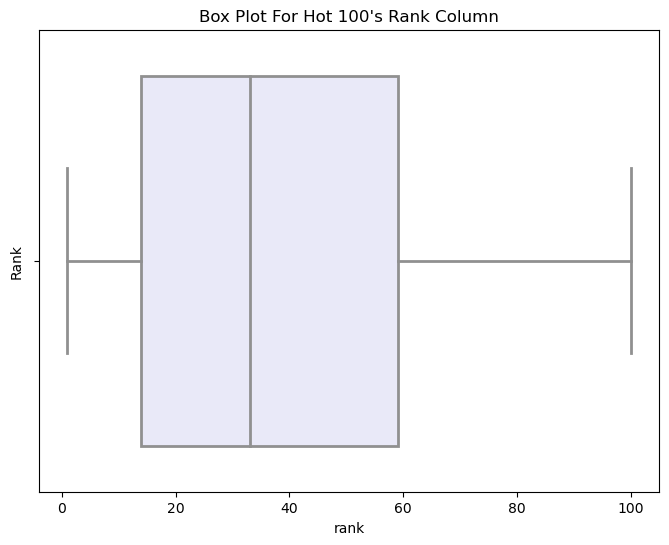

In [50]:
# creating boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=filtered_hot100_copy, x='rank', orient='h', linewidth=2, color='lavender')
plt.title("Box Plot For Hot 100's Rank Column")
plt.ylabel('Rank')
plt.show()

There are no outliers in the rank column! 

In [51]:
filtered_hot100_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8622 entries, 22 to 199389
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   artist           8622 non-null   object        
 1   chart_week       8622 non-null   datetime64[ns]
 2   rank             8622 non-null   int64         
 3   song_title       8622 non-null   object        
 4   main_artist      8622 non-null   object        
 5   featured_artist  8622 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 729.6+ KB


Information about this dataset:

- 8622 observations
- 6 features 
    - 4 are categorical
    - 1 is a date/time data type
    - 1 is numerical
- No missing values present in the dataframe
- Normalization is not needed as this dataset only has one numerical column which does not contain conituous numerical values, rather ranking values. 

### Artist's Corresponding Genre 

**Reading the dataset**

In [52]:
artist_genres = pd.read_csv('artist_general_info.csv')
artist_genres_df = pd.DataFrame(artist_genres)
artist_genres_df.head()

,artist,genre,followers,popularity
0,Rickie Lee Jones,"['folk', 'singer-songwriter']",194186,44
1,Christopher Cross,"['mellow gold', 'soft rock', 'yacht rock']",991746,63
2,Sheena Easton,"['mellow gold', 'minneapolis sound', 'new roma...",663311,54
3,Men At Work,"['album rock', 'australian rock', 'classic roc...",1213416,67
4,Culture,"['new romantic', 'new wave', 'new wave pop', '...",1527866,63


In [53]:
# checking the dimenesion of the df
artist_genres_df.shape

(43, 4)

In [54]:
# similar to the best_new_df, will be dropping the first five rows
artist_genres_df = artist_genres_df.drop(artist_genres_df.index[:5])
artist_genres_df = artist_genres_df.reset_index()
artist_genres_df.head()

,index,artist,genre,followers,popularity
0,5,Cyndi Lauper,"['dance pop', 'new wave pop', 'permanent wave'...",2574782,71
1,6,Sade,"['british soul', 'sophisti-pop']",3643971,73
2,7,Bruce Hornsby & The Range,"['album rock', 'heartland rock', 'mellow gold'...",394117,53
3,8,Jody Watley,"['contemporary r&b', 'freestyle', 'minneapolis...",310445,38
4,9,Tracy Chapman,"['folk', 'lilith', 'singer-songwriter', ""women...",1678918,73


First and foremost, I will go ahead a drop the 'followers' and 'popularity' column. I have no need for these two columns as they were calculated through Spotify with a specific algorithm. I will determine the success of an artists on my own later on. I will also drop the index column

In [55]:
# dropping the three columns
artist_genres_df = artist_genres_df.drop(['followers', 'popularity', 'index'], axis = 'columns')

artist_genres_df.head()

,artist,genre
0,Cyndi Lauper,"['dance pop', 'new wave pop', 'permanent wave'..."
1,Sade,"['british soul', 'sophisti-pop']"
2,Bruce Hornsby & The Range,"['album rock', 'heartland rock', 'mellow gold'..."
3,Jody Watley,"['contemporary r&b', 'freestyle', 'minneapolis..."
4,Tracy Chapman,"['folk', 'lilith', 'singer-songwriter', ""women..."


I am going to go ahead and remove the brackets and quotations surring the genres. 

Since many artists associate with several dfferent genres, I want to analyze of all of the genres each artist is associated to during the EDA portion of my project. However, due to the fact that I do not have a large dataset,  and a lot of the genres listed are fairily specific to one of the artists in the dateset, I will be generalizing the genres based off of their parent genre in the modeling portion of my project. 


In [57]:
# removing brackets using string slicing 
artist_genres_df['genre'] = artist_genres_df['genre'].str[1:-1]
artist_genres_df.head()

,artist,genre
0,Cyndi Lauper,"'dance pop', 'new wave pop', 'permanent wave',..."
1,Sade,"'british soul', 'sophisti-pop'"
2,Bruce Hornsby & The Range,"'album rock', 'heartland rock', 'mellow gold',..."
3,Jody Watley,"'contemporary r&b', 'freestyle', 'minneapolis ..."
4,Tracy Chapman,"'folk', 'lilith', 'singer-songwriter', ""women'..."


In [60]:
# removing quotations
artist_genres_df['genre'] = artist_genres_df['genre'].str.replace("'", "")

artist_genres_df.head()

,artist,genre
0,Cyndi Lauper,"dance pop, new wave pop, permanent wave, soft ..."
1,Sade,"british soul, sophisti-pop"
2,Bruce Hornsby & The Range,"album rock, heartland rock, mellow gold, piano..."
3,Jody Watley,"contemporary r&b, freestyle, minneapolis sound..."
4,Tracy Chapman,"folk, lilith, singer-songwriter, ""womens music"""


In [62]:
artist_genres_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  38 non-null     object
 1   genre   38 non-null     object
dtypes: object(2)
memory usage: 736.0+ bytes


Information about this dataset:

- 38 observations
- 2 features 
    - Both are categorical
- No missing values present in the dataframe
- Normalization is not needed as this dataset only has one numerical column which does not contain conituous numerical values, rather ranking values. 

## MTV Video Music Award Winners/Nominees 

**Reading the dataset**

In [63]:
vmas_awards = pd.read_csv('vmas_winners_nominees2.csv')
vmas_awards_df = pd.DataFrame(vmas_awards)
vmas_awards_df.head()

,date,award_category,artist_name,win
0,1985-09-13,Best Art Direction In a Video,Don Henley,Yes
1,1985-09-13,Best Art Direction In a Video,Culture Club,No
2,1985-09-13,Best Art Direction In a Video,Madonna,No
3,1985-09-13,Best Art Direction In a Video,Peter Brown,No
4,1985-09-13,Best Art Direction In a Video,Simple Minds,No


Very similar to the Billboard Hot100s split I had to do to the dataset, I will be splitting the vmas_awards_df too. This is because of the fact that the songs that won or were nominated may have more than one main artist on it, as well as more than one or more featured artists. That steps I will take are as follows:

1. Splitting the main artists from the featured artists using variations of the seperator "featuring".
    - will split them into two columns, main_artist and featured_artist column
2. Splitting the main artists by commas.
    - Split in seperate main_artist columns (main_artist_1, main_artist_2, etc.)
3. Splitting the featured artists by comma.
    - Split in seperate featured_artist columns (featured_artist_1, featured_artist_2, etc.)

In [411]:
# making copy of the original vmas_awards_df
vmas_copy = vmas_awards_df

In [412]:
# START CITATION 

# link/s below were used to help me generate the following code (splitting columns and regular expressions)

# https://saturncloud.io/blog/how-to-split-pandas-dataframe-column-values-in-python/#:~:text=Splitting%20Pandas%20dataframe%20column%20values%20can%20be%20done%20using%20the,string%2C%20or%20a%20regular%20expression.
# https://www.dataquest.io/blog/regex-cheatsheet/
# https://note.nkmk.me/en/python-split-rsplit-splitlines-re/


### First Split

In [413]:
# splitting the artist_name column by the word feature (and its variations)
vmas_copy[['main_artist', 'featured_artists']] = vmas_copy['artist_name'].str.split(r'\s+(?:Feat.|feat.|Feat|feat)\s+', n = 1, expand = True)

vmas_copy.head()

,date,award_category,artist_name,win,main_artist,featured_artists
0,1985-09-13,Best Art Direction In a Video,Don Henley,Yes,Don Henley,None
1,1985-09-13,Best Art Direction In a Video,Culture Club,No,Culture Club,None
2,1985-09-13,Best Art Direction In a Video,Madonna,No,Madonna,None
3,1985-09-13,Best Art Direction In a Video,Peter Brown,No,Peter Brown,None
4,1985-09-13,Best Art Direction In a Video,Simple Minds,No,Simple Minds,None


In [414]:
# END CITATION

### Second Split

While the main artists were intially seperated by commas during the data collection process, one artist's stage name includes a comma. Therefore, I will account for this artist when seperating the main artist column. The artist Tyler, the Creator will be an exception for this split. 

In [415]:
# START CITATION 

# link/s below were used to help me generate the following code (splitting columns and regular expressions)

# https://saturncloud.io/blog/how-to-split-pandas-dataframe-column-values-in-python/#:~:text=Splitting%20Pandas%20dataframe%20column%20values%20can%20be%20done%20using%20the,string%2C%20or%20a%20regular%20expression.
# https://www.dataquest.io/blog/regex-cheatsheet/
# https://note.nkmk.me/en/python-split-rsplit-splitlines-re/


In [416]:
# splitting the main artists column by commas with the exception of Tyler, The Creator
vmas_split2 = vmas_copy['main_artist'].str.split(r'(?<!Tyler),\s*', expand = True)

# naming the column headers

# creating empty lists to hold the column names for the split columns
col_headers = []

# iterating through the split columns
for i in range(vmas_split2.shape[1]): 
    
    # creating header
    header = f'main_artist_{i + 1}'
    
    #appending to empty list
    col_headers.append(header)

# assignign the new column headers to the vmas_split2 df 
vmas_split2.columns = col_headers

# concatenating the split columns with the original df
vmas_copy = pd.concat([vmas_copy, vmas_split2], axis=1)

#resetting index
vmas_copy.reset_index(drop=True, inplace=True)

vmas_copy.head()

,date,award_category,artist_name,win,main_artist,featured_artists,main_artist_1,main_artist_2,main_artist_3,main_artist_4,main_artist_5
0,1985-09-13,Best Art Direction In a Video,Don Henley,Yes,Don Henley,None,Don Henley,None,None,None,None
1,1985-09-13,Best Art Direction In a Video,Culture Club,No,Culture Club,None,Culture Club,None,None,None,None
2,1985-09-13,Best Art Direction In a Video,Madonna,No,Madonna,None,Madonna,None,None,None,None
3,1985-09-13,Best Art Direction In a Video,Peter Brown,No,Peter Brown,None,Peter Brown,None,None,None,None
4,1985-09-13,Best Art Direction In a Video,Simple Minds,No,Simple Minds,None,Simple Minds,None,None,None,None


In [70]:
# END CITATION

### Third Split

In [71]:
# START CITATION 

# link/s below were used to help me generate the following code (splitting columns and regular expressions)

# https://saturncloud.io/blog/how-to-split-pandas-dataframe-column-values-in-python/#:~:text=Splitting%20Pandas%20dataframe%20column%20values%20can%20be%20done%20using%20the,string%2C%20or%20a%20regular%20expression.
# https://www.dataquest.io/blog/regex-cheatsheet/
# https://note.nkmk.me/en/python-split-rsplit-splitlines-re/


In [417]:
# splitting the featured artist column by commas
vmas_split3 = vmas_copy['featured_artists'].str.split(',', expand = True)

# naming the column headers

# creating empty lists to hold the column names for the split columns
col_headers = []

# iterating through the split columns
for i in range(vmas_split3.shape[1]): 
    
    # creating header
    header = f'featured_artist_{i+1}'
    
    #appending to empty list
    col_headers.append(header)

# assigning the new column headers to the vmas_split3 df 
vmas_split3.columns = col_headers

# concatenate the split columns with the original df
vmas_copy = pd.concat([vmas_copy, vmas_split3], axis=1)

vmas_copy.head()

,date,award_category,artist_name,win,main_artist,featured_artists,main_artist_1,main_artist_2,main_artist_3,main_artist_4,main_artist_5,featured_artist_1,featured_artist_2,featured_artist_3,featured_artist_4,featured_artist_5,featured_artist_6
0,1985-09-13,Best Art Direction In a Video,Don Henley,Yes,Don Henley,None,Don Henley,None,None,None,None,None,None,None,None,None,None
1,1985-09-13,Best Art Direction In a Video,Culture Club,No,Culture Club,None,Culture Club,None,None,None,None,None,None,None,None,None,None
2,1985-09-13,Best Art Direction In a Video,Madonna,No,Madonna,None,Madonna,None,None,None,None,None,None,None,None,None,None
3,1985-09-13,Best Art Direction In a Video,Peter Brown,No,Peter Brown,None,Peter Brown,None,None,None,None,None,None,None,None,None,None
4,1985-09-13,Best Art Direction In a Video,Simple Minds,No,Simple Minds,None,Simple Minds,None,None,None,None,None,None,None,None,None,None


In [73]:
# END CITATION

Since artist_name, featured_artists, and main_artists have the same information that is contained in the split columns, I will be dropping these three columns.

In [74]:
# dropping the three columns
vmas_copy = vmas_copy.drop(['artist_name', 'featured_artists', 'main_artist'], axis = 'columns')

vmas_copy.head()

,date,award_category,win,main_artist_1,main_artist_2,main_artist_3,main_artist_4,main_artist_5,featured_artist_1,featured_artist_2,featured_artist_3,featured_artist_4,featured_artist_5,featured_artist_6
0,1985-09-13,Best Art Direction In a Video,Yes,Don Henley,None,None,None,None,None,None,None,None,None,None
1,1985-09-13,Best Art Direction In a Video,No,Culture Club,None,None,None,None,None,None,None,None,None,None
2,1985-09-13,Best Art Direction In a Video,No,Madonna,None,None,None,None,None,None,None,None,None,None
3,1985-09-13,Best Art Direction In a Video,No,Peter Brown,None,None,None,None,None,None,None,None,None,None
4,1985-09-13,Best Art Direction In a Video,No,Simple Minds,None,None,None,None,None,None,None,None,None,None


In [75]:
# START CITATION 

# link/s below were used to help me generate the following code (striping whitespace)

# https://www.geeksforgeeks.org/pandas-strip-whitespace-from-entire-dataframe/

In [76]:
# removing the possible white spaces the strings have from splitting
for col in vmas_copy.iloc[:, 3:]:
    vmas_copy[col] = vmas_copy[col].str.strip()

In [77]:
# END CITATION

**Filtered VMAS Dataset**

Now that I finished splitting the artists in the VMAS Awards dataset, I will use the final split dataset to to create a filtered dataset that only displays the instances where each of the artists in the "best_new" dataset won or were nominated for an award. This will be the dataset I will utilize from here on out, as I am focusing my analysis on those specific artists. 

To do this, I will scan through each main artist/featured artist column on the dataset in order to find these artists.

In [78]:
# START CITATION 

# link/s below were used to help me generate the following code (selecting based on multiple conditions)

# https://note.nkmk.me/en/python-pandas-multiple-conditions/


In [79]:
# Best New Award Winners
selected_artists = best_new_df['artist'].unique()

# Filtering the hot100_split4 DataFrame to include rows where any of the selected artists appear
filtered_vmas = vmas_copy[
    (vmas_copy['main_artist_1'].isin(selected_artists)) |
    (vmas_copy['main_artist_2'].isin(selected_artists)) |
    (vmas_copy['main_artist_3'].isin(selected_artists)) |
    (vmas_copy['main_artist_4'].isin(selected_artists)) |
    (vmas_copy['main_artist_5'].isin(selected_artists)) |
    (vmas_copy['featured_artist_1'].isin(selected_artists)) |
    (vmas_copy['featured_artist_2'].isin(selected_artists)) |
    (vmas_copy['featured_artist_3'].isin(selected_artists)) |
    (vmas_copy['featured_artist_4'].isin(selected_artists)) |
    (vmas_copy['featured_artist_5'].isin(selected_artists)) |
    (vmas_copy['featured_artist_6'].isin(selected_artists)) 
]

filtered_vmas.head()

,date,award_category,win,main_artist_1,main_artist_2,main_artist_3,main_artist_4,main_artist_5,featured_artist_1,featured_artist_2,featured_artist_3,featured_artist_4,featured_artist_5,featured_artist_6
38,1985-09-13,Best Female Video,No,Cyndi Lauper,None,None,None,None,None,None,None,None,None,None
39,1985-09-13,Best Female Video,No,Sade,None,None,None,None,None,None,None,None,None,None
54,1985-09-13,Best New Artist in a Video,No,Sade,None,None,None,None,None,None,None,None,None,None
186,1987-09-11,Best Cinematography in a Video,No,Cyndi Lauper,None,None,None,None,None,None,None,None,None,None
207,1987-09-11,Best Female Video,No,Cyndi Lauper,None,None,None,None,None,None,None,None,None,None


In [80]:
# END CITATION

### Shrinking the dataset 

There are a lot of missing values in the filter_vmas dataset. The resaon for this is that some songs that won or were nominated have more artists on a song than others, leaving some songs with columns with null values the main/featured columns. 

I want to make this dataset as easy to read as possible, therefore I want to combine the five main artist columns into ONE main artist column and the 6 featured artist columns into ONE featured artist column. If the best new artist was a main artist in a song that was nominated or won in the VMAS, the main artist column will be listed as yes, while the fetaured artists column will be listed as no. Simlarily, if the artist was a featured artist in the song, the main artist column will be listed as no, while the featured artist column will be listed as yes. This will reduce the number of columns in the dataset as well as the massive amount of null values in the dataset. 

To do this I will:

    - make a copy of the filtered_vmas df to not corrupt the original filtered dataset and avoid confusion.
    - Create three new columns: main_artist, featured_artist, artist.
        - main_artist and featured_artist: Will have "no" values as default
        - artist: Will have None values as default
    - Iterate through each row in the filtered_vmas df copy and focus on the five main artist columns. 
    - Iterate through the selected_artists datasets (best_new artist winners) and check to see if the artists is present in any of the three columns. 
        - If they are present, then the main_artist column will be marked as yes.
        - If they are not present, then the featured_artists will be marked as yes.
    - assign the searched artists name to the artists column
    


In [81]:
# making a copy of the filtered vmas dataset 
filtered_vmas_copy = filtered_vmas

In [82]:
# START CITATION 

# link/s below were used to help me generate the following code (.at() and .values())

# https://www.geeksforgeeks.org/python-pandas-dataframe-values/
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html

In [83]:
# setting default values for new columns
filtered_vmas_copy['main_artist'] = 'no'
filtered_vmas_copy['featured_artist'] = 'no'
filtered_vmas_copy['artist'] = 'Name Not Found'

# iterating through EACH ROW in filtered_vmas_copy
for index, row in filtered_vmas_copy.iterrows():
    
    # iterating through EACH ARTIST in the SELECTED ARTIST list
    for artist in selected_artists:
        
            if (artist in row.values[3:9]): # looking at the five main artist columns
                filtered_vmas_copy.at[index, 'main_artist'] = 'yes' # marking yes for main artist column at that specific 
            else: # if the artist was not found in the main artist column then they are a featured artist for this instance
                filtered_vmas_copy.at[index, 'featured_artist'] = 'yes' # marking yes for featured artist column at that specific row
    
    # assigning the name of the searched artists to the specific row and artist name column
    for artist in selected_artists:
        if artist in row.values[3:]: # searching artist name in the the df from the third column on
            filtered_vmas_copy.at[index, 'artist'] = artist # if found, assign the name to the artist name column 
            break  # stop searching

/var/folders/_9/30xxb8nj1dn787v03737xz0c0000gn/T/ipykernel_8908/3835282506.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/_9/30xxb8nj1dn787v03737xz0c0000gn/T/ipykernel_8908/3835282506.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/_9/30xxb8nj1dn787v03737xz0c0000gn/T/ipykernel_8908/3835282506.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [84]:
# END CITATION

In [85]:
filtered_vmas_copy.head()

,date,award_category,win,main_artist_1,main_artist_2,main_artist_3,main_artist_4,main_artist_5,featured_artist_1,featured_artist_2,featured_artist_3,featured_artist_4,featured_artist_5,featured_artist_6,main_artist,featured_artist,artist
38,1985-09-13,Best Female Video,No,Cyndi Lauper,None,None,None,None,None,None,None,None,None,None,yes,yes,Cyndi Lauper
39,1985-09-13,Best Female Video,No,Sade,None,None,None,None,None,None,None,None,None,None,yes,yes,Sade
54,1985-09-13,Best New Artist in a Video,No,Sade,None,None,None,None,None,None,None,None,None,None,yes,yes,Sade
186,1987-09-11,Best Cinematography in a Video,No,Cyndi Lauper,None,None,None,None,None,None,None,None,None,None,yes,yes,Cyndi Lauper
207,1987-09-11,Best Female Video,No,Cyndi Lauper,None,None,None,None,None,None,None,None,None,None,yes,yes,Cyndi Lauper


In [86]:
# reordering the columns and excluding main/featured split columns
filtered_vmas_copy = filtered_vmas_copy.iloc[:, [16,0,1,2,14,15]]


filtered_vmas_copy.head()

,artist,date,award_category,win,main_artist,featured_artist
38,Cyndi Lauper,1985-09-13,Best Female Video,No,yes,yes
39,Sade,1985-09-13,Best Female Video,No,yes,yes
54,Sade,1985-09-13,Best New Artist in a Video,No,yes,yes
186,Cyndi Lauper,1987-09-11,Best Cinematography in a Video,No,yes,yes
207,Cyndi Lauper,1987-09-11,Best Female Video,No,yes,yes


In [87]:
filtered_vmas_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 216 entries, 38 to 4026
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   artist           216 non-null    object
 1   date             216 non-null    object
 2   award_category   216 non-null    object
 3   win              216 non-null    object
 4   main_artist      216 non-null    object
 5   featured_artist  216 non-null    object
dtypes: object(6)
memory usage: 19.9+ KB


In [88]:
filtered_vmas_copy['win'].unique()

array(['No ', 'Yes', 'Yes ', 'No'], dtype=object)

The 'win'column contains leading whitespaces in some of the values. Below I will go ahead and remove these whitespaces.

In [89]:
# START CITATION 

# link/s below were used to help me generate the following code

# https://www.geeksforgeeks.org/pandas-strip-whitespace-from-entire-dataframe/ (stripping whitespace)

In [90]:
# stripping white spaces from win column
filtered_vmas_copy['win'] = filtered_vmas_copy['win'].str.strip()

/var/folders/_9/30xxb8nj1dn787v03737xz0c0000gn/T/ipykernel_8908/1354932932.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [91]:
# END CITATION 

In [92]:
filtered_vmas_copy['win'].unique()

array(['No', 'Yes'], dtype=object)

Now there are no more values in the 'win' column with leading whitespaces. 

Also, the date column is listed as a numerical data type. I will go ahead and change it to a date/time data type

In [93]:
filtered_vmas_copy['date'] = pd.to_datetime(filtered_vmas_copy['date'])

/var/folders/_9/30xxb8nj1dn787v03737xz0c0000gn/T/ipykernel_8908/2033136591.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [94]:
filtered_vmas_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 216 entries, 38 to 4026
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   artist           216 non-null    object        
 1   date             216 non-null    datetime64[ns]
 2   award_category   216 non-null    object        
 3   win              216 non-null    object        
 4   main_artist      216 non-null    object        
 5   featured_artist  216 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 19.9+ KB


There are no missing values in this dataset!

Information about this dataset: 
- 216 observations
- 6 features
    - 5 are categorical
    - 1 is a date/time data type
- No missing values present in the dataset
- Normalization not needed as this dataset does not have any numerical column, therefore there is no need to standarzie any scales.
- Outlier detection not needed, as there are no numerical columns present.



## American Music Awards Dataset 

**Reading the dataset**

In [418]:
amas_awards = pd.read_csv('ama_wins_nominees2.csv')
amas_awards_df = pd.DataFrame(amas_awards)
amas_awards_df.head()

,date,award_name,artist_name,win
0,1985-01-28,Favorite Country Album,Kenny Rogers,Yes
1,1985-01-28,Favorite Country Album,Ricky Skaggs,No
2,1985-01-28,Favorite Country Album,Alabama,No
3,1985-01-28,Favorite Country Band/Duo/Group,Alabama,Yes
4,1985-01-28,Favorite Country Band/Duo/Group,The Statler Brothers,No


In [419]:
# checking the dimensions of the new df
amas_awards_df.shape

(3157, 4)

Very similar to the Billboard Hot100s and VMAS split I had to do to the datasets, I will be splitting the amas_awards_df too. This is because of the fact that the songs may have more than main artist on it, as well as more one or more featured artists. Luckily, the American Music Awards did not list the artists as featured artists, instead they were all viewed as the main artists. The steps I will take are as follows:

1. Splitting the artists from the featured artists using the seperator ",".


In [420]:
# copying the amas_awards_df
amas_copy = amas_awards_df

In [421]:
# START CITATION 

# link/s below were used to help me generate the following code 

# https://note.nkmk.me/en/python-split-rsplit-splitlines-re/ (splitting columns)

In [422]:
# splitting the artist name column by comma seperator
amas_split = amas_copy['artist_name'].str.split(',', expand = True)

# naming the columns
amas_split.columns = [f'artist_{i + 1}' for i in range(amas_split.shape[1])]

col_headers = []

# iterating through the split columns
for i in range(amas_split.shape[1]): 
    
    # creating header
    header = f'artist_{i + 1}'
    
    #appending to empty list
    col_headers.append(header)

# assigning the new column headers to the amas_split df 
amas_split.columns = col_headers

# concatenating the split columns with the original df
amas_copy = pd.concat([amas_copy, amas_split], axis=1)

amas_copy.head()

,date,award_name,artist_name,win,artist_1,artist_2,artist_3,artist_4,artist_5,artist_6
0,1985-01-28,Favorite Country Album,Kenny Rogers,Yes,Kenny Rogers,None,None,None,None,None
1,1985-01-28,Favorite Country Album,Ricky Skaggs,No,Ricky Skaggs,None,None,None,None,None
2,1985-01-28,Favorite Country Album,Alabama,No,Alabama,None,None,None,None,None
3,1985-01-28,Favorite Country Band/Duo/Group,Alabama,Yes,Alabama,None,None,None,None,None
4,1985-01-28,Favorite Country Band/Duo/Group,The Statler Brothers,No,The Statler Brothers,None,None,None,None,None


In [100]:
# END CITATION

I can now drop the artist_name column as it contains the same information as the split columns. 

In [101]:
# dropping the artist_name column 
amas_copy = amas_copy.drop('artist_name', axis = 1)
amas_copy.head()

,date,award_name,win,artist_1,artist_2,artist_3,artist_4,artist_5,artist_6
0,1985-01-28,Favorite Country Album,Yes,Kenny Rogers,None,None,None,None,None
1,1985-01-28,Favorite Country Album,No,Ricky Skaggs,None,None,None,None,None
2,1985-01-28,Favorite Country Album,No,Alabama,None,None,None,None,None
3,1985-01-28,Favorite Country Band/Duo/Group,Yes,Alabama,None,None,None,None,None
4,1985-01-28,Favorite Country Band/Duo/Group,No,The Statler Brothers,None,None,None,None,None


In [102]:
amas_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3157 entries, 0 to 3156
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        3157 non-null   object
 1   award_name  3157 non-null   object
 2   win         3157 non-null   object
 3   artist_1    3157 non-null   object
 4   artist_2    100 non-null    object
 5   artist_3    13 non-null     object
 6   artist_4    5 non-null      object
 7   artist_5    4 non-null      object
 8   artist_6    2 non-null      object
dtypes: object(9)
memory usage: 222.1+ KB


In [103]:
# START CITATION 

# link/s below were used to help me generate the following code

# https://www.geeksforgeeks.org/pandas-strip-whitespace-from-entire-dataframe/ (stripping whitespace)

In [104]:
# removing the possible white spaces the strings have from splitting
for col in amas_copy.iloc[:, 3:]:
    amas_copy[col] = amas_copy[col].str.strip()

In [105]:
# END CITATION

In [106]:
# START CITATION 

# link/s below were used to help me generate the following code (selecting based on multiple conditions)

    # https://note.nkmk.me/en/python-pandas-multiple-conditions/

In [107]:
# Best New Award Winners
selected_artists = best_new_df['artist'].unique()

# filtering the ama_copy df to include rows where any of the selected artists appear
filtered_amas = amas_copy[
    (amas_copy['artist_1'].isin(selected_artists)) |
    (amas_copy['artist_2'].isin(selected_artists)) |
    (amas_copy['artist_3'].isin(selected_artists)) |
    (amas_copy['artist_4'].isin(selected_artists)) |
    (amas_copy['artist_5'].isin(selected_artists)) |
    (amas_copy['artist_6'].isin(selected_artists))

]

filtered_amas.head()

,date,award_name,win,artist_1,artist_2,artist_3,artist_4,artist_5,artist_6
36,1985-01-28,Favorite Pop/Rock Female Artist,Yes,Cyndi Lauper,None,None,None,None,None
39,1985-01-28,Favorite Pop/Rock Female Video Artist,Yes,Cyndi Lauper,None,None,None,None,None
150,1986-01-27,Favorite Soul/R&B Female Video Artist,No,Sade,None,None,None,None,None
325,1988-01-25,Favorite Soul/R&B Song,No,Jody Watley,None,None,None,None,None
358,1989-01-30,Favorite Pop/Rock Female Artist,No,Tracy Chapman,None,None,None,None,None


In [108]:
# END CITATION

### Shrinking the dataset 

There are a lot of missing values in the filter_amas dataset. The resaon for this is that some songs that won or were nominated have more artists on a song than others, leaving some songs with artist columns with missing values. 

I want to make this dataset as easy to read, therefore I want to combine the six artist columns into ONE artist column. Since none of the artists nominated for the awards were listed as features, I will only add an 'artist' column which will just list the artist that appears in the row. 

To do this I will:

    - make a copy of the filtered_amas df to not corrupt the original filtered dataset and avoid confusion.
    - Create the artist column.
    - Iterate through each row in the filtered_amas df copy and focus on the six artist columns. 
    - Iterate through the selected_artists datasets (best_new artist winners) and check to see if the artists is present in any of the 6 columns. 
    - Add the artist who is present in the row to the artist column
    


In [109]:
# making a copy of the filtered_amas df
filtered_amas_copy = filtered_amas

In [110]:
# START CITATION 

# link/s below were used to help me generate the following code (.at(), .value())

# https://www.geeksforgeeks.org/python-pandas-dataframe-values/
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.at.html

In [111]:
# setting default values for new column
filtered_amas_copy['artist'] = 'Name Not Found' 

# iterating thrugh EACH ROW in filtered_amas_copy
for index, row in filtered_amas_copy.iterrows():
    
    # iterating through EACH ARTIST in the SELECTED ARTIST list
    for artist in selected_artists:
        
        if artist in row.values[3:]: # searching artist name in the the df from the third column on
            filtered_amas_copy.at[index, 'artist'] = artist # if found, assign the name to the artist name column
            break  # stop searching 
            

/var/folders/_9/30xxb8nj1dn787v03737xz0c0000gn/T/ipykernel_8908/1552952478.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [112]:
# END CITATION

In [113]:
filtered_amas_copy.head()

,date,award_name,win,artist_1,artist_2,artist_3,artist_4,artist_5,artist_6,artist
36,1985-01-28,Favorite Pop/Rock Female Artist,Yes,Cyndi Lauper,None,None,None,None,None,Cyndi Lauper
39,1985-01-28,Favorite Pop/Rock Female Video Artist,Yes,Cyndi Lauper,None,None,None,None,None,Cyndi Lauper
150,1986-01-27,Favorite Soul/R&B Female Video Artist,No,Sade,None,None,None,None,None,Sade
325,1988-01-25,Favorite Soul/R&B Song,No,Jody Watley,None,None,None,None,None,Jody Watley
358,1989-01-30,Favorite Pop/Rock Female Artist,No,Tracy Chapman,None,None,None,None,None,Tracy Chapman


In [114]:
# reordering columns
filtered_amas_copy = filtered_amas_copy.iloc[:, [9,0,1,2]]


filtered_amas_copy.head()

,artist,date,award_name,win
36,Cyndi Lauper,1985-01-28,Favorite Pop/Rock Female Artist,Yes
39,Cyndi Lauper,1985-01-28,Favorite Pop/Rock Female Video Artist,Yes
150,Sade,1986-01-27,Favorite Soul/R&B Female Video Artist,No
325,Jody Watley,1988-01-25,Favorite Soul/R&B Song,No
358,Tracy Chapman,1989-01-30,Favorite Pop/Rock Female Artist,No


In [115]:
filtered_amas_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, 36 to 3114
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   artist      228 non-null    object
 1   date        228 non-null    object
 2   award_name  228 non-null    object
 3   win         228 non-null    object
dtypes: object(4)
memory usage: 17.0+ KB


The date column is listed as a numerical data type. I will go ahead and change it to a date/time data type

In [116]:
# changing the date data type to a datatime data type
filtered_amas_copy['date'] = pd.to_datetime(filtered_amas_copy['date'])

/var/folders/_9/30xxb8nj1dn787v03737xz0c0000gn/T/ipykernel_8908/42649318.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [117]:
# START CITATION 

# link/s below were used to help me generate the following code (strip whitespace)

# https://www.geeksforgeeks.org/pandas-strip-whitespace-from-entire-dataframe/

In [118]:
# stripping white spaces from win column
filtered_amas_copy['win'] = filtered_amas_copy['win'].str.strip()

/var/folders/_9/30xxb8nj1dn787v03737xz0c0000gn/T/ipykernel_8908/3203265750.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [119]:
# END CITATION

In [120]:
filtered_amas_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 228 entries, 36 to 3114
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   artist      228 non-null    object        
 1   date        228 non-null    datetime64[ns]
 2   award_name  228 non-null    object        
 3   win         228 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 17.0+ KB


There are no missing values in this dataset!

Information about this dataset: 
- 228 observations
- 4 features
    - 3 are categorical
    - 1 is a date/time data type
- No missing values present in the dataset
- Normalization not needed as this dataset does not have any numerical column, therefore there is no need to standarzie any scales.
- Outlier detection not needed, as there are no numerical columns present.



## Recording Industry Association of America (RIAA) Awards

**Reading the dataset**

In [121]:
riaa_awards = pd.read_csv('RIAA_awards.csv')
riaa_awards_df = pd.DataFrame(riaa_awards)
riaa_awards_df.head()

,artist,title,format,award_month,award_day,award_year,award_type,type
0,Rickie Lee Jones,Flying Cowboys,Album,September,18,1997,Gold,Standard
1,Rickie Lee Jones,Pirates,Album,September,30,1981,Gold,Standard
2,Rickie Lee Jones,Rickie Lee Jones,Album,May,22,1979,Gold,Standard
3,Rickie Lee Jones,Rickie Lee Jones,Album,August,7,1979,Platinum,Standard
4,Christopher Cross,Christopher Cross,Album,August,17,1980,5x Platinum,Standard


In this dataset, the date is split into three columns (award_day, award_year, award_type). I will fix this by combining these three columns into one data column. This way I will be able to convert it to a date/time data type. 

To do this, I will first change the month labels to their respective number label. 

In [122]:
# making a copy of the riaa_awards_df
riaa_copy = riaa_awards_df

In [123]:
# START CITATION 

# link/s below were used to help me generate the following code (mapping the values to change df variable names)

# https://stackoverflow.com/questions/20250771/remap-values-in-pandas-column-with-a-dict-preserve-nans

In [124]:
# changing months to number format

month_num = {
    'January': '01',
    'February': '02',
    'March': '03',
    'April': '04',
    'May': '05',
    'June': '06',
    'July': '07',
    'August': '08',
    'September': '09',
    'October': '10',
    'November': '11',
    'December': '12'
}

# mapping the award month to its respective number 
riaa_copy['award_month'] = riaa_copy['award_month'].map(month_num)

In [125]:
# END CITATION

In [126]:
riaa_copy.head()

,artist,title,format,award_month,award_day,award_year,award_type,type
0,Rickie Lee Jones,Flying Cowboys,Album,09,18,1997,Gold,Standard
1,Rickie Lee Jones,Pirates,Album,09,30,1981,Gold,Standard
2,Rickie Lee Jones,Rickie Lee Jones,Album,05,22,1979,Gold,Standard
3,Rickie Lee Jones,Rickie Lee Jones,Album,08,7,1979,Platinum,Standard
4,Christopher Cross,Christopher Cross,Album,08,17,1980,5x Platinum,Standard


In [127]:
riaa_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   artist       1436 non-null   object
 1   title        1436 non-null   object
 2   format       1436 non-null   object
 3   award_month  1436 non-null   object
 4   award_day    1436 non-null   int64 
 5   award_year   1436 non-null   int64 
 6   award_type   1436 non-null   object
 7   type         1436 non-null   object
dtypes: int64(2), object(6)
memory usage: 89.9+ KB


Now that is has been changed to a numerical value, I will convert to a numeric data type.

In [128]:
# changing the data type of the award_month column
riaa_copy['award_month'] = pd.to_numeric(riaa_copy['award_month'])

In [129]:
riaa_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   artist       1436 non-null   object
 1   title        1436 non-null   object
 2   format       1436 non-null   object
 3   award_month  1436 non-null   int64 
 4   award_day    1436 non-null   int64 
 5   award_year   1436 non-null   int64 
 6   award_type   1436 non-null   object
 7   type         1436 non-null   object
dtypes: int64(3), object(5)
memory usage: 89.9+ KB


Now I can combine the three columns into one date column

In [130]:
# START CITATION 

# link/s below were used to help me generate the following code

# https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-pandas-dataframe (concatenating columns)

In [131]:
#combining the month, day, year column to make one date column 

# concatenating the columns to create a new date column
riaa_copy['award_date'] = riaa_copy['award_year'].astype(str) + '-' + riaa_copy['award_month'].astype(str) + '-' + riaa_copy['award_day'].astype(str)

# converting the new date column to datetime format
riaa_copy['award_date'] = pd.to_datetime(riaa_copy['award_date'])

# dropping the original columns
riaa_copy = riaa_copy.drop(['award_year', 'award_month', 'award_day'], axis=1)


In [132]:
# END CITATION

The RIAA Awards are several different awards that celebrates the amount of units an artist's song, album, or video has sold (digitally or non-digitally, usually it is specified with the award). These awards are as follows:

- Gold = 500,000 units
- Platinum = 1 million units
- 2x Platinum, 3x Platinum, 4x Platinum, etc. = 2 million, 3 million, 4 million, etc units
- Diamond = 10 million units 
- 2x Diamond, 3x Diamond, etc. = 20 million, 30 million, etc. units.

*Please note that the dates when these artists received these awards were not automatically given to them once they reached the benchmark. Instead the artist (artist's team) must submit their single's, album's, video's sales and figures to the RIAA in order to receive the respective award.*

For more information in regards to the RIAA awards please visit the following two websites which explains the history of these awards and how they are awarded: 
- https://ew.com/article/1991/03/01/real-meaning-gold-and-platinum-records/
- https://www.riaa.com/gold-platinum/story/

In order to make modeling and visualizing easier, the 2x, 3x, 4x, etc. awards will be renamed into either 'multi-platinum' or 'multi-diamond.' 

In [133]:
# START CITATION 

# link/s below were used to help me generate the following code (regular expressions)

# https://www.dataquest.io/blog/regex-cheatsheet/
# https://stackoverflow.com/questions/22588316/pandas-applying-regex-to-replace-values

In [134]:
# replacing any occurrence of '[number]x Platinum' with 'Multi Platinum'
riaa_copy['award_type'] = riaa_copy['award_type'].str.replace(r'^(\d+)x\s*Platinum$', 'Multi Platinum', regex = True)

# replacing any occurrence of '[number]x Diamond' with 'Multi Diamond'
riaa_copy['award_type'] = riaa_copy['award_type'].str.replace(r'^(\d+)x\s*Diamond$', 'Multi Diamond', regex = True)

riaa_copy.head()

,artist,title,format,award_type,type,award_date
0,Rickie Lee Jones,Flying Cowboys,Album,Gold,Standard,1997-09-18
1,Rickie Lee Jones,Pirates,Album,Gold,Standard,1981-09-30
2,Rickie Lee Jones,Rickie Lee Jones,Album,Gold,Standard,1979-05-22
3,Rickie Lee Jones,Rickie Lee Jones,Album,Platinum,Standard,1979-08-07
4,Christopher Cross,Christopher Cross,Album,Multi Platinum,Standard,1980-08-17


In [135]:
# END CITATION

To simplify future visualizing and modeling methods, I will create dummy columns for each type of award. Each dummy column will contain binary values (True or False) depending on whether the artist received that award during that instance or not. 

In [136]:
# START CITATION 

# link/s below were used to help me generate the following code (get dummy variables and renaming columns)

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html
# https://www.digitalocean.com/community/tutorials/pandas-rename-column-index

In [137]:
# making dummy columns for future analysis

# dummy_cols = ['award_type']
riaa_dummies = pd.get_dummies(riaa_copy[['award_type']], prefix = ['award_type'])
dummy_riaa_df = pd.concat([riaa_copy, riaa_dummies], axis = 1)

# dropping the award type column
dummy_riaa_df = dummy_riaa_df.drop('award_type', axis = 'columns')

# changing headers
dummy_riaa_df = dummy_riaa_df.rename(columns = {'award_type_Gold': 'gold',
                                                'award_type_Platinum': 'platinum',
                                                'award_type_Diamond': 'diamond',
                                                'award_type_Multi Diamond': 'multi_diamond',
                                                'award_type_Multi Platinum': 'multi_platinum',})

dummy_riaa_df.head()

,artist,title,format,type,award_date,diamond,gold,multi_diamond,multi_platinum,platinum
0,Rickie Lee Jones,Flying Cowboys,Album,Standard,1997-09-18,False,True,False,False,False
1,Rickie Lee Jones,Pirates,Album,Standard,1981-09-30,False,True,False,False,False
2,Rickie Lee Jones,Rickie Lee Jones,Album,Standard,1979-05-22,False,True,False,False,False
3,Rickie Lee Jones,Rickie Lee Jones,Album,Standard,1979-08-07,False,False,False,False,True
4,Christopher Cross,Christopher Cross,Album,Standard,1980-08-17,False,False,False,True,False


In [138]:
# END CITATION

In [139]:
# stripping white spaces from artist column
dummy_riaa_df['artist'] = dummy_riaa_df['artist'].str.strip()

In [140]:
dummy_riaa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   artist          1436 non-null   object        
 1   title           1436 non-null   object        
 2   format          1436 non-null   object        
 3   type            1436 non-null   object        
 4   award_date      1436 non-null   datetime64[ns]
 5   diamond         1436 non-null   bool          
 6   gold            1436 non-null   bool          
 7   multi_diamond   1436 non-null   bool          
 8   multi_platinum  1436 non-null   bool          
 9   platinum        1436 non-null   bool          
dtypes: bool(5), datetime64[ns](1), object(4)
memory usage: 63.2+ KB


There are no missing values in this dataset!

Information about this dataset: 
- 1436 observations
- 10 features
    - 4 are categorical
    - 1 is a date/time data type
    - 5 are boolean
- No missing values present in the dataset
- Normalization not needed as this dataset does not have any numerical column, therefore there is no need to standarzie any scales.
- Outlier detection not needed, as there are no numerical columns present.

## Artist Information

**Reading the dataset**

In [141]:
# reading the data
artist_info = pd.read_csv('artist_info_2.csv')
artist_info_df = pd.DataFrame(artist_info)
artist_info_df.head()

,artist,state_region,birth_country,gender,music_group
0,Rickie Lee Jones,Illinois,United States of America,Female,No
1,Christopher Cross,Texas,United States of America,Male,no
2,Sheena Easton,Lanarkshire,Scotland,Female,No
3,Men At Work,Victoria,Australia,Male,Yes
4,Culture,St. Andrew,Jamaica,Male,Yes


In [142]:
# looking at the unique values for the gender column 
artist_info_df['gender'].unique()

array(['Female ', 'Male', 'Female', 'Both', 'Both ', 'Male '],
      dtype=object)

In [143]:
# looking at the unique values for the music group column 
artist_info_df['music_group'].unique()

array(['No', 'no', 'No ', 'Yes ', 'Yes'], dtype=object)

Both column need to have white spaces removed from their values and casing change to lower case for the 'gender' and 'music_group' columns. 

In [144]:
# fixing the gender column
artist_info_df['gender'] = artist_info_df['gender'].str.lower().str.strip()

# fixing the music group column
artist_info_df['music_group'] = artist_info_df['music_group'].str.lower().str.strip()

In [145]:
# checking again
artist_info_df['gender'].unique()

array(['female', 'male', 'both'], dtype=object)

In [146]:
# checking again
artist_info_df['music_group'].unique()

array(['no', 'yes'], dtype=object)

In [147]:
artist_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   artist         43 non-null     object
 1   state_region   43 non-null     object
 2   birth_country  43 non-null     object
 3   gender         43 non-null     object
 4   music_group    43 non-null     object
dtypes: object(5)
memory usage: 1.8+ KB


There are no missing values in this dataset, and all five columns are categorical columns.

# Exploratory Data Analysis

Questions:


1. What features are most prevalent among the Best New Artists Winners?

2. Does the success of an artist's career decrease after winning this award?


In this part, I will be creating visuals not only to to bring these datasets to life, but to also try and answer some of these questions.

### 1. What features are most prevalent among the Best New Artists Winners?

First and foremost, I want view how many females and males have won this the Grammy's Best New Artist Award overall. This will be a great way to see which gender tends to receive the most awards. 

*Please note, that for bands that have a mix of genders, I have labeled the band's gender as both as "both". Furthemore, I recorded the gender of the band based on the members of the band at the time of their Grammy Win.*

In [148]:
# counting the number of wins of each gender
gender_counts = artist_info_df['gender'].value_counts()

In [149]:
gender_counts

gender
female    26
male      15
both       2
Name: count, dtype: int64

In [150]:
# START CITATION
# Code block below was learned from CMPS 240 class (Ramapo College of NJ)

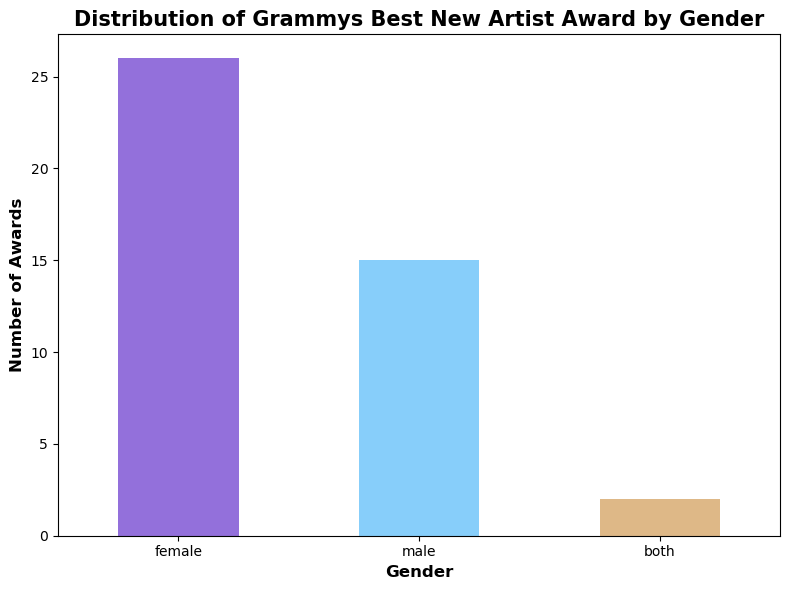

In [151]:
# creating the  bar chart
plt.figure(figsize=(6, 4))

gender_counts.plot(kind='bar', color=['mediumpurple','lightskyblue','burlywood'])

plt.title('Distribution of Grammys Best New Artist Award by Gender', 
          fontsize = 15, 
          fontweight = 'bold')

plt.xlabel('Gender', fontsize = 12, 
           fontweight='bold')

plt.ylabel('Number of Awards', fontsize = 12, 
           fontweight='bold')

plt.xticks(rotation=0) 
plt.tight_layout()

plt.show()

In [152]:
# END CITATION

**Note on Visual**

Here we can we that female artists have been awarded with the most Best New Artist awards compared to male artists and bands with both genders. I have also displayed the gender_counts dataframe so that we can view the actual counts for each gender group.

Some of the artists who have won these awards are musical groups or duos. Therefore, I also want to visualize the number of music groups vs individual artists who have won this award. 

In [153]:
# counting the number of music groups
group_counts = artist_info_df['music_group'].value_counts()

In [154]:
group_counts

music_group
no     31
yes    12
Name: count, dtype: int64

In [155]:
# START CITATION
# Code block below was learned from CMPS 240 class (Ramapo College of NJ)

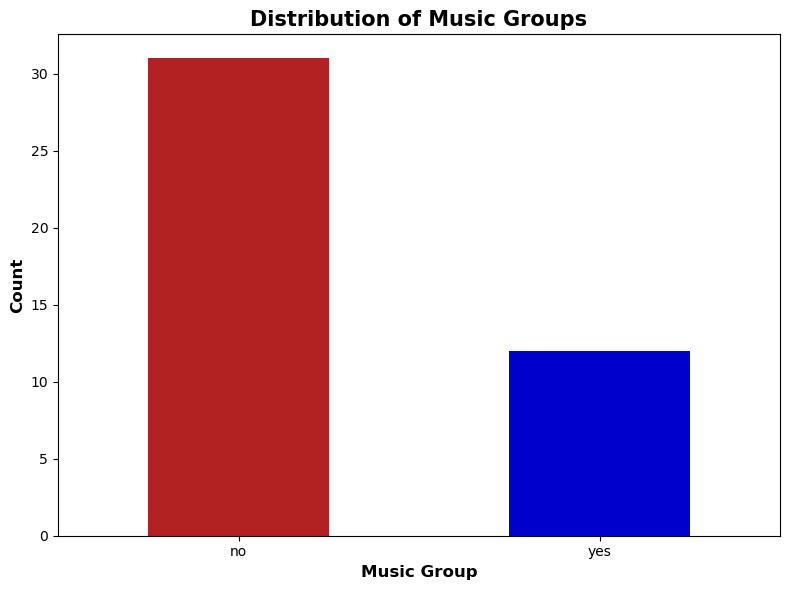

In [156]:
# creating the bar chart
plt.figure(figsize=(6, 4))

group_counts.plot(kind='bar', color=['firebrick', 'mediumblue'])

plt.title('Distribution of Music Groups', 
          fontsize = 15, 
          fontweight = 'bold')

plt.xlabel('Music Group', 
           fontsize = 12, 
           fontweight = 'bold')

plt.ylabel('Count', 
           fontsize = 12, 
           fontweight = 'bold')
plt.xticks(rotation=0) 
plt.tight_layout()

plt.show()

In [157]:
# END CITATION

**Note on Visual**

As we can see here, individual artists have received the most Best New Artist Awards compared to music groups. However, we can see that there are quite a handful of musical groups who have won this award, almost half the amount of individual artist. 

Next up, since each artist is associated with several different genres, I want to visualize the most common genres these Best New Artist winners associate with. In order to do this, I will create a word cloud to display the most common genres present in the artist_genre dataframe.

In [158]:
# if you havent already, this package needs to be installed to create the work cloud
#pip install WordCloud

In [159]:
# START CITATION 

# link/s below were used to help me generate the following code (replace text in string, .join)

# https://stackoverflow.com/questions/28986489/how-to-replace-text-in-a-string-column-of-a-pandas-dataframe
# https://www.programiz.com/python-programming/methods/string/join

In [423]:
# combining the words in each genre string into a single genre string,
# example: canadian contemporary = canadiancontemporary; hip pop = hippop
# removing spaces, hyphensm and replacing "r&b" with "rhythmblues"
text_data = ' '.join(artist_genres_df['genre'].str.replace(' ', '').str.replace('-', '').str.replace('r&b', 'rhythmblues').str.replace(',', ' ').values)


In [424]:
# END CITATION

In [425]:
# checking the output of the text_data variable
text_data

'dancepop newwavepop permanentwave softrock britishsoul sophistipop albumrock heartlandrock mellowgold pianorock singersongwriter softrock contemporaryrhythmblues freestyle minneapolissound newjackswing quietstorm urbancontemporary folk lilith singersongwriter "womensmusic" freestyle newjackswing newwavepop dancepop pop urbancontemporary mellowgold atlhiphop conscioushiphop hiphop oldschoolatlantahiphop contemporaryrhythmblues dancepop rhythmblues urbancontemporary lilith newwavepop permanentwave poprock singersongwriter heartlandrock poprock postgrunge contemporarycountry country countrydawn countryroad ectofolk lilith newwavepop poprock alternativerhythmblues conscioushiphop hiphop neosoul newjerseyrap rhythmblues dancepop pop contemporaryvocaljazz ectofolk folk lilith neosoul pop rhythmblues contemporaryvocaljazz jazzpop vocaljazz alternativemetal pop neosoul pop popsoul urbancontemporary classicoklahomacountry contemporarycountry country countrydawn dancepop pop britishsoul neosoul

In [163]:
# START CITATION 

# link/s below were used to help me generate the following code (word cloud)

# https://www.datacamp.com/tutorial/wordcloud-python

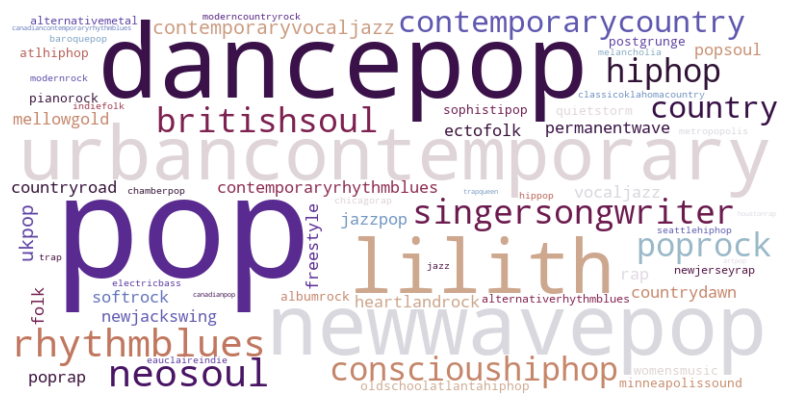

In [164]:
# creating the wordcloud 
wordcloud = WordCloud(width = 800, 
                      height = 400, 
                      background_color = 'white', 
                      colormap = 'twilight', 
                      random_state = 30).generate(text_data)

# displaying word cloud
plt.figure(figsize = (8, 6))
plt.imshow(wordcloud, 
           interpolation = 'bilinear')
plt.axis('off')

plt.show()

In [165]:
# END CITATION

**Notes of Visual**

Here we can see the word cloud of the genre key words, with the most popular words being "pop", "urbancontemporary", "dancepop" , "newwavepop", and "lilith".

In this section, out of curiousity I wanted to look at the artists a little more in depthly and see where most of these winners originate from. I will create a bar chart that will display the number of artists in eachc country.

In [166]:
# grouping the countries and counting the artists from that country

country_count = artist_info_df['birth_country'].value_counts()

country_count_df = pd.DataFrame(country_count)

country_count_df = country_count_df.reset_index()

In [167]:
artist_info_df['birth_country'].unique()

array(['United States of America', 'Scotland', 'Australia', 'Jamaica',
       'Nigeria', 'Germany', 'England', 'Canada'], dtype=object)

There are 8 countries that the Best New Artist's represent

In [168]:
country_count_df

,birth_country,count
0,United States of America,33
1,England,4
2,Scotland,1
3,Australia,1
4,Jamaica,1
5,Nigeria,1
6,Germany,1
7,Canada,1


In [169]:
# START CITATION 

# link/s below were used to help me generate the following code (creating and customizing the bar char)

# https://python-graph-gallery.com/3-control-color-of-barplots/
# https://stackoverflow.com/questions/11264521/date-ticks-and-rotation

Text(0, 0.5, 'Count')

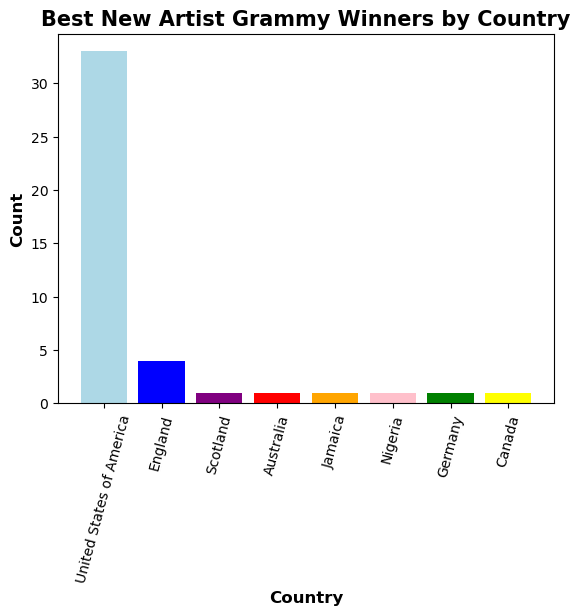

In [170]:
color = ['lightblue', 'blue', 'purple', 'red', 'orange', 'pink', 'green', 'yellow']

# Create bars
fig, ax = plt.subplots()
ax.bar(country_count_df['birth_country'], country_count_df['count'],
       color=color,
       linewidth=3)

ax.tick_params(axis='x', rotation=75)

plt.title('Best New Artist Grammy Winners by Country', 
          fontsize = 15, 
          fontweight = 'bold')

plt.xlabel('Country', 
           fontsize = 12, 
           fontweight = 'bold')

plt.ylabel('Count', 
           fontsize = 12, 
           fontweight = 'bold')

In [171]:
# END CITATION

### Does the success of an artist's career decrease after winning this award?

In order to view the timelines of these artists and when they received awards and had charted singles, I decided to create two x-axis interactive timeline charts using plotly in order to visualize these events in chronlogical order. This will allow us to really view the length of the artist's career. While this may not be a clear cut answer to the success of an artist, it will showcase the longevity of these artists an how active they were post award win.

In [172]:
# START CITATION 

# link/s below were used to help me generate the following code ()

# (creating scatter plot) https://plotly.com/python/line-and-scatter/
# (add multiple traces in one plot) https://stackoverflow.com/questions/72349796/add-a-plotly-express-trace-to-a-graph-objects-go-figure-with-multiple-traces
# (plotly.go parameters) https://plotly.com/python-api-reference/generated/plotly.graph_objects.Scatter.html
# (Hover text) https://stackoverflow.com/questions/59057881/how-to-customize-hover-template-on-with-what-information-to-show
# (removign trace name) https://community.plotly.com/t/how-to-remove-the-trace0-and-trace-1-boxes-when-hovering-over-pie-charts-in-subplot/76302/2
# (date) https://plotly.github.io/plotly.py-docs/generated/plotly.graph_objects.Waterfall.html

In [427]:
# creating Plotly graph objects figure
fig = go.Figure()

# creating the scatter plot timeline 

# scatter points for Best New Artist Win
fig.add_trace(go.Scatter(x = best_new_df['award_date'], 
                         y = best_new_df['artist'],
                         mode = 'markers', 
                         marker = dict(line = dict(width = 2,
                                                color = 'black'),
                                     symbol = 'star', 
                                     size = 20, 
                                     color = 'gold'),
                         name = 'Best New Artist',
                         hovertemplate = 'Artist: %{y}'+'<br>Date: %{x|%Y-%m-%d} <extra></extra>',
                        ))
    
    
# scatter points for VMA awards
fig.add_trace(go.Scatter(x = filtered_vmas_copy['date'], 
                         y = filtered_vmas_copy['artist'],
                         mode = 'markers', 
                         marker = dict(line = dict(width = 1),
                                     symbol = 'circle', 
                                     size = 10, 
                                     color = 'darkorange'),
                         opacity = 0.9,
                         name = 'VMA Win/Nomination',
                         hovertemplate = 'Artist Name: %{y}'+'<br>Date: %{x|%Y-%m-%d} <extra></extra>'
        
                        ))

# scatter points for AMA awards
fig.add_trace(go.Scatter(x = filtered_amas_copy['date'],
                         y = filtered_amas_copy['artist'],
                         mode = 'markers', 
                         marker = dict(line = dict(width = 1),
                                     symbol = 'circle', 
                                     size = 10, 
                                     color = 'limegreen'),
                         opacity = 0.9,
                         name = 'AMA Win/Nomination',
                         hovertemplate = 'Artist: %{y}'+'<br>Date: %{x|%Y-%m-%d} <extra></extra>'
                        ))

fig.update_layout(width = 800, 
                  height = 600,
                  plot_bgcolor = 'lightgray',
                  title = 'Awards Received by Artists',
                  title_font = dict(size = 20, family = 'Arial, sans serif'),
                  xaxis = dict(title='Date', 
                             title_font = dict(size = 15, family = 'Helvetica, sans-serif'),
                             tickfont = dict(size = 10)),
                  yaxis = dict(title ='Artist',
                             title_font = dict(size = 15, family = 'Helvetica, sans-serif'), 
                             tickfont = dict(size =10), 
                             autorange ="reversed"), 
                  legend = dict(font = dict(size = 10))
                 )

# showing the interactive plot
py.plot(fig, filename='vma_ama_timeline.html')

'vma_ama_timeline.html'

Here I am creating the same time line, but to display when each artist won the Grammy's Best New Artist Award and when they had songs charting on Billboard Hot 100s chart 

In [174]:
fig = go.Figure()

# scatter points for Best New Artist Win
fig.add_trace(go.Scatter(x = best_new_df['award_date'], y = best_new_df['artist'],
                         mode = 'markers', marker = dict(line = dict(width = 2,
                                                                 color = 'black'),
                                                     symbol = 'star', 
                                                     size = 20, 
                                                     color = 'gold'),
                         name = 'Best New Artist Win', 
                         hovertemplate = 'Artist: %{y}'+'<br>Date: %{x} <extra></extra>'))
    
# scatter points for hot 100s df
fig.add_trace(go.Scatter(x = filtered_hot100_copy['chart_week'], 
                         y = filtered_hot100_copy['artist'],
                         mode ='markers', 
                         opacity = 0.7,
                         marker = dict(symbol = 'circle', 
                                     size = 10, 
                                     color = 'purple'),
                         name = 'Charted Song',
                         hovertemplate = 'Artist: %{y}'+'<br>Date: %{x} <extra></extra>'))

fig.update_layout(width = 800, 
                  height = 600, 
                  plot_bgcolor = 'lightgray',
                  title = 'Billboard Hot 100s Charted Songs',
                  title_font = dict(size = 20),
                  xaxis = dict(title = 'Date', 
                               title_font = dict(size = 15, 
                                                 family = 'Helvetica, sans-serif'), 
                               tickfont = dict(size = 10)),
                  yaxis = dict(title = 'Artist',
                               title_font = dict(size = 15, 
                                                 family = 'Helvetica, sans-serif'), 
                               tickfont = dict(size = 10),
                               autorange ="reversed"),
                  legend = dict(font = dict(size = 10))
                 )

# showing the interactive plot
py.plot(fig, filename='hot100s_timeline.html')

'hot100s_timeline.html'

In [175]:
# END CITATION

**Notes on Visuals**

First and foremost, both timelines depict similar conclusions which is that not every artist's career was short lived after winning the award. 

Let's first observe the vma_ama timeline:

In this timeline, we are comparing the VMAS and AMAS Award and Nomination activity for each artist after they won the Best New Artist award. This allows me to see if these artists are still being recognized for their art after being named the Best New Artist for their respective year. This timeline gives us a mixed bag; some artists do tend to go dormant after winning the Best New Artist Awards, either not winning or being nominated for any award post-win, or winning a couple of awards right after wining and never again. These artists include: 

- Cyndi Lauper
- Bruce Hornby & The Range 
- Jody Watley 
- Tracy Chapman (one an award a couple yars after but thats it) 
- Milli Vanilli
- Marc Cohn
- Arrested Development 
- Hootie & The Blowfish
- Paula Cole
- Lauryn Hill
- Shelby Lynn
- Norah Jones (similar to Tracy Chapman)
- Amy Winehouse 
- Esperanza Spalding 
- Bon Iver
- fun.
- Macklemore & Ryan Lewis 
- Sam Smith
- Megan Trainor
- Chance The Rapper
- Alessia Cara
- ** Please note, the artists from Dua Lipa on I did not consider as there is not enough data to determine how well they did in regards to award wins after winning the Best New Artist Award. Though, so far it seems that there is a lot of activity going on with these artists. 

The remaining artists have either won consecutive awards in the following years until the early 2020s/present day, or have retirend to the public's eye after being dormant.  

Next let's look at the Billboard Hot 100s Timeline: 

This is my personal favorite timeline. In my opinion, the Billboard Hot 100s is a very good indicator of how well an artist is doing in the music industry. The Hot 100s is a pretty big deal, and many artists do seek to get on the charts and flaunt when they do get on the charts. This chart displays how well a certain song is doing, combining sales, streams, radio play, and online downloads. So being on the chart in general is a big deal In this timeline, we can see a skeleton of how the careers of artists are/were going. 

We can see a lot of artists actually had a long flourishing career post-award win. Mariah Carey for example had a very long, consistent career after winning the Best New Artist Award. She has consecutively appeared on the charts year after year. Similarly Christina Aguilera also had a long and successful run post-award winning, also landing a spot on the charts consistantly. What does charts tell us? Basically, these timelines shows that not every artist's career suffered post-award win. Many artists were/are still relevant to this day, or have had a generally long career. While there are artist's who did suffer landing on the charts post win (Sade, Paula Cole, Esperanza Spalding, fun.), this may not be the work of the "Best New Artist Curse" as we can clearly see a large handful of the artists continued to have pretty successful careers. 


# Bar Plots

In this part I have created several bar plots representing the counts of the number of Hot100s singles and artist has received, the number of albums released, number of VMAS and AMAS awards received, and the number of RIAA awards they have received. 

### Billboard Singles Count

Let's go ahead and find out how many singles each artist has had on the charts.

In [176]:
#hot100 songs count:

hot100s_count = filtered_hot100_copy['artist'].value_counts()

hot100s_count_df = pd.DataFrame({'num_on_chart':hot100s_count})

hot100s_count_df = hot100s_count_df.reset_index()

hot100s_count_df

,artist,num_on_chart
0,Mariah Carey,833
1,Maroon 5,708
2,Carrie Underwood,630
3,Alicia Keys,442
4,Dua Lipa,431
5,Christina Aguilera,427
6,Adele,360
7,Sam Smith,355
8,Zac Brown Band,350
9,Billie Eilish,331


Here I created a dataframe with the number of songs each artist has had on the Billboard Hot 100s Chart.

In [177]:
# START CITATION 

# link/s below were used to help me generate the following code (horizontal bar plot)

# https://www.geeksforgeeks.org/matplotlib-pyplot-barh-function-in-python/

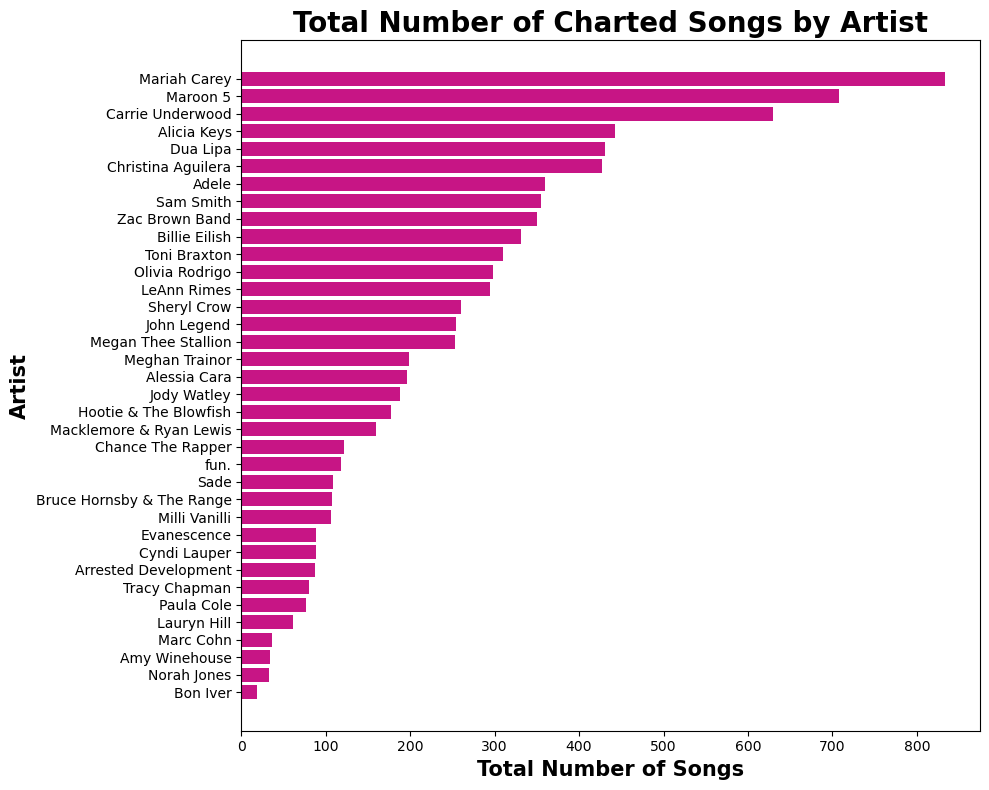

In [178]:
# sorting the hot100s_count in descending order
hot100s_count_sorted = hot100s_count.sort_values(ascending=True)

# Create a horizontal bar chart of the total Hot100s song received by each artist
plt.figure(figsize=(10, 8))
plt.barh(hot100s_count_sorted.index, hot100s_count_sorted, color='mediumvioletred')

plt.title('Total Number of Charted Songs by Artist', 
          fontsize = 20, 
          fontweight = 'bold')

plt.xlabel('Total Number of Songs', 
           fontsize = 15, 
           fontweight = 'bold')

plt.ylabel('Artist', 
           fontsize = 15, 
           fontweight = 'bold')

plt.tight_layout()

plt.show()

In [179]:
# END CITATION

Overall Mariah Carey, Maroon 5, and Carrie Underwood have made the most appearances on the Billboard'd Hot 100s chart. Each of these artists having at least 600 appearances on the chart in between 1985-2022. It is really interesting to note that the top 10 artists in this bar chart all from a variety of music generations. For example, Mariah Carey emerged 90's, Maroon 5 in the 2000's, Dua Lipa in the late 2010's, Adele in the late 2000's/early 2010's. Indicating that Best New Artists from different eras have been able to sustain successful careers overtime. 

### VMAS Wins And Nominations Count

In this section, I will be counting the number of wins and nominations thse artists have received from the MTV Video Music Awards.

In [180]:
# START CITATION 

# link/s below were used to help me generate the following code (.groupby() and value counts)

# https://stackoverflow.com/questions/39132742/groupby-value-counts-on-the-dataframe-pandas

In [181]:
#vmas count:

vmas_count = filtered_vmas_copy.groupby(['artist', 'win']).size().unstack(fill_value = 0)

# updating the column headers to reflect whetehr the artist won or lost
vmas_count.columns = ['vmas_lost', 'vma_win']

vmas_count.reset_index()

vmas_count

,vmas_lost,vma_win
artist,,
Adele,17,3
Alessia Cara,6,2
Alicia Keys,10,4
Amy Winehouse,3,0
Arrested Development,2,2
Billie Eilish,21,6
Carrie Underwood,1,0
Christina Aguilera,21,4
Cyndi Lauper,3,0


In [182]:
# END CITATION

Above I create a dataframe with the number of Video Music Award wins and nominations (loss) each artist has received.

### AMAS Wins And Nominations Count 

In this section, I will be counting the number of wins and nominations (losses) thse artists have received from the Americsn Music Awards. 

In [183]:
# START CITATION 

# link/s below were used to help me generate the following code (.groupby() and value counts)

# https://stackoverflow.com/questions/39132742/groupby-value-counts-on-the-dataframe-pandas

In [184]:
amas_count = filtered_amas_copy.groupby(['artist', 'win']).size().unstack(fill_value = 0)

# updating the column headers to reflect whetehr the artist won or lost
amas_count.columns = ['amas_lost', 'amas_win']

amas_count.reset_index()

amas_count

,amas_lost,amas_win
artist,,
Adele,9,5
Alessia Cara,2,0
Alicia Keys,11,5
Arrested Development,5,0
Billie Eilish,6,2
Carrie Underwood,9,17
Christina Aguilera,2,0
Cyndi Lauper,0,2
Dua Lipa,5,2


In [185]:
# END CITATION

Above I created a dataframe with the number of American Music Award wins and nominations (losses) each artist has received.

### RIAA Awards Count

Below I will count the number of RIAA Awards an artists has received. HOWEVER, I will also be count each type of RIAA award they received, these types include:

- Diamond
- Platinum
- Gold
- Multi-Platinum
- Multi-Diamond

I will be using the dummy_rias_df dataframe, as it already splits each type of award into seperate columns and has information on whether the artist won it or not. 

In [186]:
# reading only the last five columns of the dummy riaa df
last_five_cols = dummy_riaa_df.iloc[:, -5:]

# grouping by artist and adding the values in the last five columns for each artist
riaa_counts = last_five_cols.groupby(dummy_riaa_df['artist']).sum()

riaa_counts

,diamond,gold,multi_diamond,multi_platinum,platinum
artist,,,,,
Adele,3,20,0,54,15
Alessia Cara,0,10,0,10,5
Alicia Keys,0,31,0,37,20
Amy Winehouse,0,3,0,1,3
Arrested Development,0,5,0,3,1
Billie Eilish,1,26,0,15,21
Bon Iver,0,9,0,1,3
Bruce Hornsby & The Range,0,3,0,2,2
Carrie Underwood,0,29,0,35,24


In [187]:
# adding columns with the overall total amount of RIAA awards an artist received
riaa_counts['total'] = riaa_counts.sum(axis=1)

riaa_counts.head()

,diamond,gold,multi_diamond,multi_platinum,platinum,total
artist,,,,,,
Adele,3,20,0,54,15,92
Alessia Cara,0,10,0,10,5,25
Alicia Keys,0,31,0,37,20,88
Amy Winehouse,0,3,0,1,3,7
Arrested Development,0,5,0,3,1,9


Below I will create a stacked bar chart displaying the total RIAA awards these artists received. This will make it easier to visual the riaa_count dataset

In [188]:
# sorting the riaa_counts in descending order
riaa_counts_sorted = riaa_counts.sort_values(by='total', ascending=True)

In [189]:
# START CITATION 

# link/s below were used to help me generate the following code (horizonatal, stacked bar plot)

# https://www.geeksforgeeks.org/matplotlib-pyplot-barh-function-in-python/

<Figure size 2000x1500 with 0 Axes>

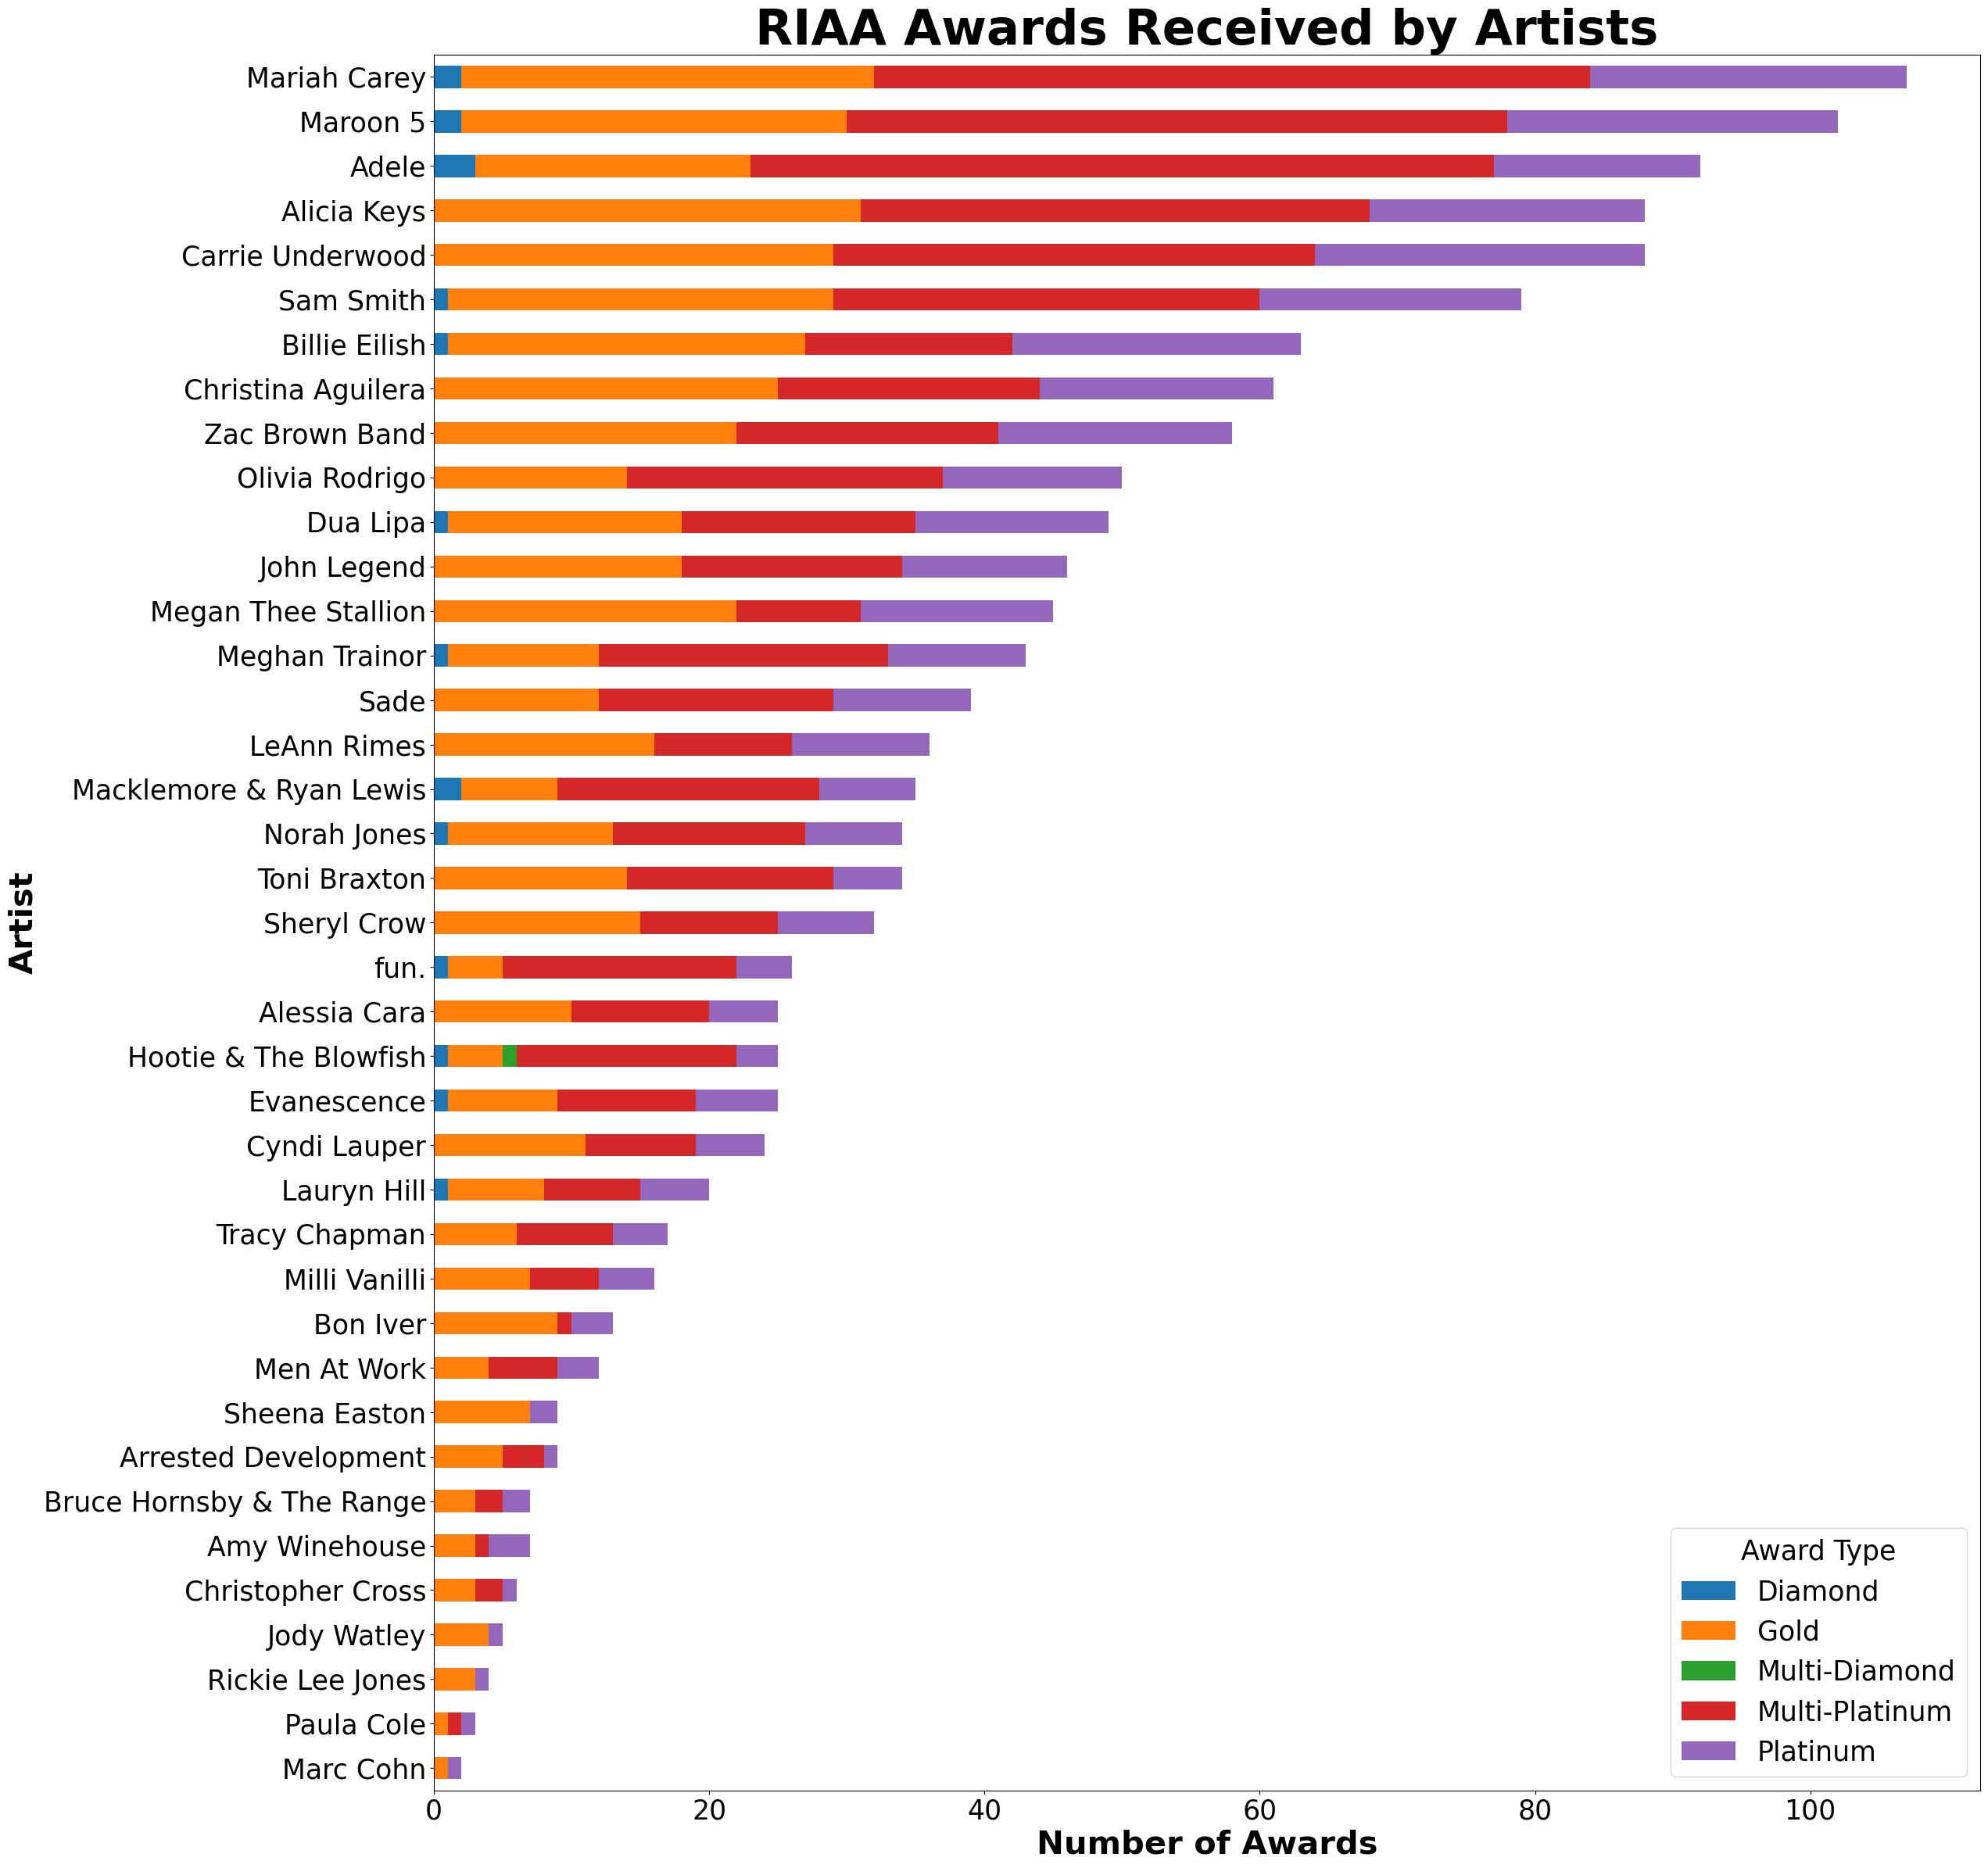

In [190]:
# dropping the total column as it is not needed for this dataframe
riaa_counts_sorted = riaa_counts_sorted.drop(columns = 'total')

legend_labels = ['Diamond', 'Gold', 'Multi-Diamond', 'Multi-Platinum', 'Platinum']

plt.figure(figsize=(20, 15))

riaa_counts_sorted.plot(kind='barh', stacked=True)
plt.title('RIAA Awards Received by Artists', fontsize = 45, fontweight = 'bold')
plt.xlabel('Number of Awards', fontsize = 30, fontweight = 'bold')
plt.ylabel('Artist', fontsize = 30, fontweight = 'bold')
plt.xticks(fontsize=25)  # Adjust x-axis tick labels font size
plt.yticks(fontsize=25)
plt.legend(legend_labels, title='Award Type', loc='lower right', title_fontsize = 25, fontsize = 25)
plt.subplots_adjust(right=0.5)  # Increase space on the right side for the legend

plt.tight_layout(rect=[6, 5,10, 10])

plt.show()

In [191]:
# END CITATION

Mariah Carey, Maroon 5, and Adele are the top three artists that received RIAA awards. Similar to the Billboard Hot 100s bar chart analysis, the top 10 artists on this chart are also from different music eras, from the 1990's to 2022. 

## Quantifying Success (check the time range)

Let's try an quantify success

For this project success will be based off the number of Billboard Singles, RIAA Awards, and AMAS/VMAS awards eac artist has received within the five years AFTER the won the Best New Artist award. Therefore, I will not be including the Best New Artists from 2018 - 2022. Each feature will be ranked on a 5-point scale.


Billboard single: If chart position/rank is 
- 1 - 20: 5 points per song
- 21 - 40: 4 points per song
- 41 - 60: 3 points per song
- 61 - 80: 2 points per song
- 81 - 100: 1 point per song 
- featured artist: 1 point per song 

RIAA Awards:
- Multi-Diamond: 5 points
- Diamond: 4 points
- Multi-Platinum: 3 points
- Platinum: 2 points
- Gold: 1 points

AMAS/VMAS Awards:
- Win: 5 points
- Nomination: 2 points



### Billboard Hot 100s Score

In [192]:
filtered_hot100_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8622 entries, 22 to 199389
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   artist           8622 non-null   object        
 1   chart_week       8622 non-null   datetime64[ns]
 2   rank             8622 non-null   int64         
 3   song_title       8622 non-null   object        
 4   main_artist      8622 non-null   object        
 5   featured_artist  8622 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 729.6+ KB


In [193]:
# START CITATION 

# link/s below were used to help me generate the following code (.dateoffset)

# https://pandas.pydata.org/docs/reference/api/pandas.tseries.offsets.DateOffset.html

In [194]:
# merging 'filtered_hot100_copy' with 'best_new_df' on the 'artist' column
merged_df = pd.merge(filtered_hot100_copy, best_new_df, on='artist', how='inner')

# filtering the singles within five years after the award date
# the chart week date must be in the artist's best new artist win date AND five years after 
# their best new artist win date. 
filtered_df = merged_df[(merged_df['chart_week'] >= merged_df['award_date']) &
                        (merged_df['chart_week'] <= merged_df['award_date'] + pd.DateOffset(years=5))]

In [195]:
# END CITATION

In [196]:
filtered_df.head()

,artist,chart_week,rank,song_title,main_artist,featured_artist,award_date
0,Billie Eilish,2024-02-03,23,What Was I Made For?,yes,no,2020-01-26
1,Billie Eilish,2024-01-27,20,What Was I Made For?,yes,no,2020-01-26
2,Billie Eilish,2024-01-20,16,What Was I Made For?,yes,no,2020-01-26
3,Billie Eilish,2024-01-13,20,What Was I Made For?,yes,no,2020-01-26
4,Billie Eilish,2023-12-30,49,What Was I Made For?,yes,no,2020-01-26


In [197]:
# START CITATION 

# link/s below were used to help me generate the following code

# https://pandas.pydata.org/docs/dev/reference/api/pandas.concat.html (concataneting row to df)
# https://www.geeksforgeeks.org/how-to-add-one-row-in-an-existing-pandas-dataframe/ (adding row to df)

In [198]:
# scoring each artist

billboard_scores_df = pd.DataFrame(columns = ['artist', 'billboard_score'])

# score variable 
score = 0 

for index, row in filtered_df.iterrows():
    
    # this if-else statement represents whether the artist was a main artist or not
    if row['main_artist'] == 'yes':
        
        # these if-else statements represents the chart rank position of the song
        if 1 <= row['rank'] <= 20:
            score += 5
        
        elif 21 <= row['rank'] <= 40:
            score += 4
        
        elif 41 <= row['rank'] <= 60:
            score += 3
        
        elif 61 <= row['rank'] <= 80:
            score += 2
        
        else:
            score += 1
            
    # not main artist        
    else:
        score += 1
    
    #adding the score to the df
    if row['artist'] in billboard_scores_df['artist'].values:
        
        billboard_scores_df.loc[billboard_scores_df['artist'] == row['artist'], 'billboard_score'] += score
    
    # adding artist in df if they are not already there, adding score too    
    else:
        new_row = pd.DataFrame({'artist': [row['artist']], 'billboard_score': [score]})
        billboard_scores_df = pd.concat([billboard_scores_df, new_row], ignore_index = True)
        
    # resetting score variable
    score = 0   
        
billboard_scores_df.head()

,artist,billboard_score
0,Billie Eilish,546
1,Dua Lipa,1314
2,Olivia Rodrigo,357
3,Mariah Carey,1191
4,Meghan Trainor,192


In [199]:
# END CITATION

In [200]:
# START CITATION 

# link/s below were used to help me generate the following code

# https://www.geeksforgeeks.org/python-pandas-merging-joining-and-concatenating/ (merging)

In [201]:
# merging with the best_new_df to display all the Best New Artists and their respective score
merged_billboard_scores = pd.merge(best_new_df, billboard_scores_df, on = 'artist', how = 'left')

merged_billboard_scores['billboard_score'] = merged_billboard_scores['billboard_score'].fillna(0)

In [202]:
# END CITATION

In [203]:
# changing data type
merged_billboard_scores['billboard_score'] = merged_billboard_scores['billboard_score'].astype('int64')

I am going to remove the artists that won 2019 and on, since I do not have a full five yeasr of info on these artists

In [204]:
# START CITATION 

# link/s below were used to help me generate the following code (excluding values in df based on specific conditions)

# https://stackoverflow.com/questions/71142985/exclude-values-in-df-column
# https://stackoverflow.com/questions/55330568/how-to-exclude-rows-based-on-multi-column-value-conditions-in-pandas-dataframe

In [205]:
# removing artists that won after 2018 (2019, 2020, 2021, 2022)
# this variable will be used throughout the rest of the project 
excluded_artists = ['Olivia Rodrigo', 'Megan Thee Stallion', 'Billie Eilish', 'Dua Lipa']

In [206]:
# df without the excluded artists
filter_billboard_scores = merged_billboard_scores[~merged_billboard_scores['artist'].isin(excluded_artists)]

filter_billboard_scores = filter_billboard_scores.reset_index()

filter_billboard_scores = filter_billboard_scores.drop(columns = 'index')

filter_billboard_scores

,award_date,artist,billboard_score
0,1985-02-26,Cyndi Lauper,276
1,1986-02-25,Sade,118
2,1987-02-24,Bruce Hornsby & The Range,244
3,1988-03-02,Jody Watley,313
4,1989-02-22,Tracy Chapman,4
5,1990-02-21,Milli Vanilli,30
6,1991-02-20,Mariah Carey,1191
7,1992-02-25,Marc Cohn,0
8,1993-02-24,Arrested Development,94
9,1994-03-01,Toni Braxton,734


In [207]:
# END CITATION

### VMAS//AMAS Score

In [208]:
# START CITATION 

# link/s below were used to help me generate the following code (merging)

# https://www.geeksforgeeks.org/python-pandas-merging-joining-and-concatenating/

In [209]:
# merging 'filtered_vmas_copy' with 'best_new_df' on the 'artist' column
merged_vmas = pd.merge(filtered_vmas_copy, best_new_df, on='artist', how='inner')

In [210]:
merged_vmas

,artist,date,award_category,win,main_artist,featured_artist,award_date
0,Cyndi Lauper,1985-09-13,Best Female Video,No,yes,yes,1985-02-26
1,Cyndi Lauper,1987-09-11,Best Cinematography in a Video,No,yes,yes,1985-02-26
2,Cyndi Lauper,1987-09-11,Best Female Video,No,yes,yes,1985-02-26
3,Sade,1985-09-13,Best Female Video,No,yes,yes,1986-02-25
4,Sade,1985-09-13,Best New Artist in a Video,No,yes,yes,1986-02-25
...,...,...,...,...,...,...,...
211,Olivia Rodrigo,2021-09-12,Song of the Year,Yes,yes,yes,2022-04-03
212,Olivia Rodrigo,2022-08-28,Best Editing,No,yes,yes,2022-04-03
213,Olivia Rodrigo,2022-08-28,Best Longform Video,No,yes,yes,2022-04-03
214,Olivia Rodrigo,2022-08-28,Best Pop,No,yes,yes,2022-04-03


In [211]:
# END CITATION

In [212]:
# START CITATION 

# link/s below were used to help me generate the following code (.dateoffset)

# https://pandas.pydata.org/docs/reference/api/pandas.tseries.offsets.DateOffset.html

In [213]:
# filtering the singles within five years after the award date
five_yr_vmas = merged_vmas[(merged_vmas['date'] >= merged_vmas['award_date']) &
                        (merged_vmas['date'] <= merged_vmas['award_date'] + pd.DateOffset(years=5))]

In [214]:
five_yr_vmas.head()

,artist,date,award_category,win,main_artist,featured_artist,award_date
0,Cyndi Lauper,1985-09-13,Best Female Video,No,yes,yes,1985-02-26
1,Cyndi Lauper,1987-09-11,Best Cinematography in a Video,No,yes,yes,1985-02-26
2,Cyndi Lauper,1987-09-11,Best Female Video,No,yes,yes,1985-02-26
5,Jody Watley,1988-09-07,Best Female Video,No,yes,yes,1988-03-02
6,Jody Watley,1988-09-07,Best New Artist in a Video,No,yes,yes,1988-03-02


In [215]:
# END CITATION

In [216]:
five_yr_vmas['featured_artist'].unique()

array(['yes'], dtype=object)

No artists are considered features!

In [217]:
# START CITATION 

# link/s below were used to help me generate the following code

# https://stackoverflow.com/questions/39132742/groupby-value-counts-on-the-dataframe-pandas (groupby value counts)

In [218]:
# counting the number of wins and losses

vmas_count = five_yr_vmas.groupby(['artist', 'win']).size().unstack(fill_value = 0)

# renaming headers
vmas_count.columns = ['vmas_lost', 'vmas_win']

vmas_count.reset_index()

,artist,vmas_lost,vmas_win
0,Adele,5,3
1,Alessia Cara,3,0
2,Alicia Keys,5,2
3,Arrested Development,1,1
4,Billie Eilish,14,3
5,Carrie Underwood,1,0
6,Christina Aguilera,16,2
7,Cyndi Lauper,3,0
8,Dua Lipa,14,1
9,Evanescence,1,0


In [219]:
# END CITATION

In [220]:
# START CITATION 

# link/s below were used to help me generate the following code

# https://www.geeksforgeeks.org/python-pandas-merging-joining-and-concatenating/ (merge)

In [221]:
# merging the count with the best_new_df

counts_vmas_merge = pd.merge(best_new_df, vmas_count, on = 'artist', how = 'left')

# changing data types anf filling in missing values 
counts_vmas_merge['vmas_lost'] = counts_vmas_merge['vmas_lost'].fillna(0).astype('int64')

counts_vmas_merge['vmas_win'] = counts_vmas_merge['vmas_win'].fillna(0).astype('int64')

counts_vmas_merge.head()

,award_date,artist,vmas_lost,vmas_win
0,1985-02-26,Cyndi Lauper,3,0
1,1986-02-25,Sade,0,0
2,1987-02-24,Bruce Hornsby & The Range,0,0
3,1988-03-02,Jody Watley,8,0
4,1989-02-22,Tracy Chapman,1,0


In [222]:
# END CITATION

In [223]:
# START CITATION 

# link/s below were used to help me generate the following code (excluding values in df based on specific conditions)

# https://stackoverflow.com/questions/71142985/exclude-values-in-df-column
# https://stackoverflow.com/questions/55330568/how-to-exclude-rows-based-on-multi-column-value-conditions-in-pandas-dataframe

In [224]:
# making df without the excluded artists

filter_vmas_five = counts_vmas_merge[~counts_vmas_merge['artist'].isin(excluded_artists)]

filter_vmas_five = filter_vmas_five.reset_index()

filter_vmas_five = filter_vmas_five.drop(columns = 'index')

filter_vmas_five['vmas_lost'] = filter_vmas_five['vmas_lost']

filter_vmas_five['vmas_win'] = filter_vmas_five['vmas_win']

In [225]:
# END CITATION

In [226]:
# finding overall vmas score
vmas_score_list = []

for index, row in filter_vmas_five.iterrows():
    artist_score = (row['vmas_lost'] * 2) + (row['vmas_win'] * 5)
    vmas_score_list.append(artist_score)
    
filter_vmas_five['vmas_score'] = vmas_score_list

filter_vmas_five.head()

,award_date,artist,vmas_lost,vmas_win,vmas_score
0,1985-02-26,Cyndi Lauper,3,0,6
1,1986-02-25,Sade,0,0,0
2,1987-02-24,Bruce Hornsby & The Range,0,0,0
3,1988-03-02,Jody Watley,8,0,16
4,1989-02-22,Tracy Chapman,1,0,2


**AMAS Score**

In [227]:
# START CITATION 

# link/s below were used to help me generate the following code (.dateoffset)

# https://pandas.pydata.org/docs/reference/api/pandas.tseries.offsets.DateOffset.html

In [228]:
# merging 'filtered_amas_copy' with 'best_new_df' on the 'artist' column
merged_amas = pd.merge(filtered_amas_copy, best_new_df, on='artist', how='inner')


# filtering the singles within five years after the award date
five_yr_amas = merged_amas[(merged_amas['date'] >= merged_amas['award_date']) &
                        (merged_amas['date'] <= merged_amas['award_date'] + pd.DateOffset(years=5))]

five_yr_amas.head()

,artist,date,award_name,win,award_date
3,Sade,1989-01-30,Favorite Soul/R&B Female Artist,No,1986-02-25
17,Mariah Carey,1992-01-27,Favorite Dance Song,No,1991-02-20
18,Mariah Carey,1992-01-27,Favorite Pop/Rock Female Artist,No,1991-02-20
19,Mariah Carey,1992-01-27,Favorite Soul/R&B Female Artist,Yes,1991-02-20
20,Mariah Carey,1993-01-25,Favorite Adult Contemporary Album,Yes,1991-02-20


In [229]:
# END CITATION

In [230]:
# START CITATION 

# link/s below were used to help me generate the following code (groupby, value counts)

# https://stackoverflow.com/questions/39132742/groupby-value-counts-on-the-dataframe-pandas

In [231]:
# counting wins and losses
amas_count = five_yr_amas.groupby(['artist', 'win']).size().unstack(fill_value = 0)

#renaming column headers
amas_count.columns = ['amas_lost', 'amas_win']

amas_count.reset_index()

,artist,amas_lost,amas_win
0,Adele,1,4
1,Alicia Keys,1,1
2,Arrested Development,2,0
3,Billie Eilish,2,0
4,Carrie Underwood,3,5
5,Christina Aguilera,2,0
6,Dua Lipa,4,2
7,Evanescence,2,0
8,Lauryn Hill,0,2
9,LeAnn Rimes,4,0


In [232]:
# END CITATION

In [233]:
# START CITATION 

# link/s below were used to help me generate the following code (merging)

# https://www.geeksforgeeks.org/python-pandas-merging-joining-and-concatenating/

In [234]:
# merging best new df with amas count df
counts_amas_five = pd.merge(best_new_df, amas_count, on = 'artist', how = 'left')

# filling in missing values with zero
counts_amas_five['amas_lost'] = counts_amas_five['amas_lost'].fillna(0)
counts_amas_five['amas_win'] = counts_amas_five['amas_win'].fillna(0)

counts_amas_five.head()

,award_date,artist,amas_lost,amas_win
0,1985-02-26,Cyndi Lauper,0.0,0.0
1,1986-02-25,Sade,1.0,0.0
2,1987-02-24,Bruce Hornsby & The Range,0.0,0.0
3,1988-03-02,Jody Watley,0.0,0.0
4,1989-02-22,Tracy Chapman,0.0,0.0


In [235]:
# END CITATION

In [236]:
# START CITATION 

# link/s below were used to help me generate the following code (excluding values in df based on specific conditions)

# https://stackoverflow.com/questions/71142985/exclude-values-in-df-column
# https://stackoverflow.com/questions/55330568/how-to-exclude-rows-based-on-multi-column-value-conditions-in-pandas-dataframe

In [237]:
# making a df without the excluded artists
filter_amas_five = counts_amas_five[~counts_amas_five['artist'].isin(excluded_artists)]

filter_amas_five = filter_amas_five.reset_index()

filter_amas_five = filter_amas_five.drop(columns = 'index')

# changing data types
filter_amas_five['amas_lost'] = filter_amas_five['amas_lost'].astype('int64')
filter_amas_five['amas_win'] = filter_amas_five['amas_win'].astype('int64')


filter_amas_five.head()

,award_date,artist,amas_lost,amas_win
0,1985-02-26,Cyndi Lauper,0,0
1,1986-02-25,Sade,1,0
2,1987-02-24,Bruce Hornsby & The Range,0,0
3,1988-03-02,Jody Watley,0,0
4,1989-02-22,Tracy Chapman,0,0


In [238]:
# END CITATION

In [239]:
# totaling up the ama score
amas_score_list = []

for index, row in filter_amas_five.iterrows():
    artist_score = (row['amas_lost'] * 2) + (row['amas_win'] * 5)
    amas_score_list.append(artist_score)
    
filter_amas_five['amas_score'] = amas_score_list

filter_amas_five

,award_date,artist,amas_lost,amas_win,amas_score
0,1985-02-26,Cyndi Lauper,0,0,0
1,1986-02-25,Sade,1,0,2
2,1987-02-24,Bruce Hornsby & The Range,0,0,0
3,1988-03-02,Jody Watley,0,0,0
4,1989-02-22,Tracy Chapman,0,0,0
5,1990-02-21,Milli Vanilli,0,0,0
6,1991-02-20,Mariah Carey,12,6,54
7,1992-02-25,Marc Cohn,0,0,0
8,1993-02-24,Arrested Development,2,0,4
9,1994-03-01,Toni Braxton,3,3,21


### RIAA awards Score

In [240]:
dummy_riaa_df.head()

,artist,title,format,type,award_date,diamond,gold,multi_diamond,multi_platinum,platinum
0,Rickie Lee Jones,Flying Cowboys,Album,Standard,1997-09-18,False,True,False,False,False
1,Rickie Lee Jones,Pirates,Album,Standard,1981-09-30,False,True,False,False,False
2,Rickie Lee Jones,Rickie Lee Jones,Album,Standard,1979-05-22,False,True,False,False,False
3,Rickie Lee Jones,Rickie Lee Jones,Album,Standard,1979-08-07,False,False,False,False,True
4,Christopher Cross,Christopher Cross,Album,Standard,1980-08-17,False,False,False,True,False


In [241]:
# START CITATION 

# link/s below were used to help me generate the following code (merging and .dateoffset)

# https://pandas.pydata.org/docs/reference/api/pandas.tseries.offsets.DateOffset.html
# https://www.geeksforgeeks.org/python-pandas-merging-joining-and-concatenating/

In [242]:
# merging 'dummy_riaa_df' with 'best_new_df' on the 'artist' column
merged_riaa = pd.merge(dummy_riaa_df, best_new_df, on='artist', how='inner', suffixes = ('_riaa', '_bestnew'))


# filtering the singles within five years after the award date
five_yr_riaa = merged_riaa[(merged_riaa['award_date_riaa'] >= merged_riaa['award_date_bestnew']) &
                        (merged_riaa['award_date_riaa'] <= merged_riaa['award_date_bestnew'] + pd.DateOffset(years=5))]

In [243]:
# END CITATION

In [244]:
# reading the last five columns of the dummy riaa df
last_five_cols = dummy_riaa_df.iloc[:, -5:]

# grouping by artist and adding the values in the last five columns for each artist
riaa_counts = last_five_cols.groupby(five_yr_riaa['artist']).sum()

riaa_counts.head()

,diamond,gold,multi_diamond,multi_platinum,platinum
artist,,,,,
Adele,2,8,0,36,9
Alessia Cara,0,2,0,5,3
Alicia Keys,0,2,0,6,3
Amy Winehouse,0,2,0,0,0
Arrested Development,0,2,0,0,2


In [245]:
# START CITATION 

# link/s below were used to help me generate the following code

# https://www.geeksforgeeks.org/python-pandas-merging-joining-and-concatenating/ (merging)

In [246]:
# merging best new df with the riaa counts df
counts_riaa_five = pd.merge(best_new_df, riaa_counts, on = 'artist', how = 'left')

counts_riaa_five.head()

,award_date,artist,diamond,gold,multi_diamond,multi_platinum,platinum
0,1985-02-26,Cyndi Lauper,0.0,2.0,0.0,2.0,1.0
1,1986-02-25,Sade,0.0,3.0,0.0,0.0,1.0
2,1987-02-24,Bruce Hornsby & The Range,0.0,2.0,0.0,1.0,2.0
3,1988-03-02,Jody Watley,0.0,0.0,0.0,2.0,1.0
4,1989-02-22,Tracy Chapman,0.0,1.0,0.0,1.0,1.0


In [247]:
# END CITATION

In [248]:
# START CITATION 
# link/s below were used to help me generate the following code: (filling in missing values)

# https://stackoverflow.com/questions/36556256/how-do-i-fill-na-values-in-multiple-columns-in-pandas 

In [249]:
# renaming column headers
columns = ['diamond', 'gold', 'multi_diamond', 'multi_platinum', 'platinum']

# filling in missing values with 0, as that means the artist won 0 awards under that category
counts_riaa_five[columns] = counts_riaa_five[columns].fillna(0)

counts_riaa_five.head()

,award_date,artist,diamond,gold,multi_diamond,multi_platinum,platinum
0,1985-02-26,Cyndi Lauper,0.0,2.0,0.0,2.0,1.0
1,1986-02-25,Sade,0.0,3.0,0.0,0.0,1.0
2,1987-02-24,Bruce Hornsby & The Range,0.0,2.0,0.0,1.0,2.0
3,1988-03-02,Jody Watley,0.0,0.0,0.0,2.0,1.0
4,1989-02-22,Tracy Chapman,0.0,1.0,0.0,1.0,1.0


In [250]:
# END CITATION

In [251]:
# changing the data types
counts_riaa_five[columns] = counts_riaa_five[columns].astype('int64')

In [252]:
# START CITATION 

# link/s below were used to help me generate the following code (excluding values in df based on specific conditions)

# https://stackoverflow.com/questions/71142985/exclude-values-in-df-column
# https://stackoverflow.com/questions/55330568/how-to-exclude-rows-based-on-multi-column-value-conditions-in-pandas-dataframe

In [253]:
# making new df without the excluded artists
filter_riaa_five = counts_riaa_five[~counts_riaa_five['artist'].isin(excluded_artists)]

filter_riaa_five = filter_riaa_five.reset_index()

filter_riaa_five = filter_riaa_five.drop(columns = 'index')

filter_riaa_five

,award_date,artist,diamond,gold,multi_diamond,multi_platinum,platinum
0,1985-02-26,Cyndi Lauper,0,2,0,2,1
1,1986-02-25,Sade,0,3,0,0,1
2,1987-02-24,Bruce Hornsby & The Range,0,2,0,1,2
3,1988-03-02,Jody Watley,0,0,0,2,1
4,1989-02-22,Tracy Chapman,0,1,0,1,1
5,1990-02-21,Milli Vanilli,0,1,0,0,0
6,1991-02-20,Mariah Carey,0,7,0,6,4
7,1992-02-25,Marc Cohn,0,0,0,0,1
8,1993-02-24,Arrested Development,0,2,0,0,2
9,1994-03-01,Toni Braxton,0,14,0,1,5


In [254]:
# END CITATION

In [255]:
# totaling the RIAA total score
riaa_score_list = []

for index, row in filter_riaa_five.iterrows():
    artist_score = (row['diamond'] * 4) + (row['gold'] * 1) + (row['multi_diamond'] * 5) + (row['multi_platinum'] * 3) + (row['platinum'] * 2)
    riaa_score_list.append(artist_score)
    
filter_riaa_five['riaa_score'] = riaa_score_list

filter_riaa_five.head()

,award_date,artist,diamond,gold,multi_diamond,multi_platinum,platinum,riaa_score
0,1985-02-26,Cyndi Lauper,0,2,0,2,1,10
1,1986-02-25,Sade,0,3,0,0,1,5
2,1987-02-24,Bruce Hornsby & The Range,0,2,0,1,2,9
3,1988-03-02,Jody Watley,0,0,0,2,1,8
4,1989-02-22,Tracy Chapman,0,1,0,1,1,6


Below I will be merging all of the count dataframes into one dataframe.

In [256]:
# START CITATION 

# link/s below were used to help me generate the following code (merging)

# https://www.geeksforgeeks.org/python-pandas-merging-joining-and-concatenating/

In [257]:
# merging all of the score datasets to create final score df

# merging the vma and ama score dataframes
merge_1 = pd.merge(filter_vmas_five, filter_amas_five, on = 'artist')

# dropping unnecessary columns
merge_1 = merge_1.drop(columns = ['award_date_x', 
                                  'vmas_lost', 
                                  'vmas_win', 
                                  'award_date_y', 
                                  'amas_lost', 
                                  'amas_win'])

merge_1.head()

,artist,vmas_score,amas_score
0,Cyndi Lauper,6,0
1,Sade,0,2
2,Bruce Hornsby & The Range,0,0
3,Jody Watley,16,0
4,Tracy Chapman,2,0


In [258]:
# merging the first merged df with the RIAA score df
merge_2 = pd.merge(merge_1, filter_riaa_five, on = 'artist')

merge_2 = merge_2.drop(columns = ['award_date', 
                                        'diamond', 
                                        'gold', 
                                        'multi_diamond', 
                                        'multi_platinum', 
                                        'platinum'])

merge_2.head()

,artist,vmas_score,amas_score,riaa_score
0,Cyndi Lauper,6,0,10
1,Sade,0,2,5
2,Bruce Hornsby & The Range,0,0,9
3,Jody Watley,16,0,8
4,Tracy Chapman,2,0,6


In [259]:
# merging the second  merged df with the RIAA score df

all_scores = pd.merge(merge_2, filter_billboard_scores, on = 'artist')

# dropping unnecessary column
all_scores = all_scores.drop(columns = 'award_date')

all_scores.head()

,artist,vmas_score,amas_score,riaa_score,billboard_score
0,Cyndi Lauper,6,0,10,276
1,Sade,0,2,5,118
2,Bruce Hornsby & The Range,0,0,9,244
3,Jody Watley,16,0,8,313
4,Tracy Chapman,2,0,6,4


In [260]:
# END CITATION 

### Normalization

In [261]:
all_scores.describe()

,vmas_score,amas_score,riaa_score,billboard_score
count,34.000000,34.000000,34.000000,34.000000
mean,5.058824,5.735294,22.029412,287.911765
std,9.816317,11.233901,27.452974,308.089555
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,4.250000,48.000000
50%,0.000000,0.000000,15.000000,160.500000
75%,5.500000,5.500000,29.250000,486.500000
max,42.000000,54.000000,142.000000,1191.000000


In [262]:
# START CITATION 

# link/s below were used to help me generate the following code (boxplot)

# https://seaborn.pydata.org/generated/seaborn.boxplot.html

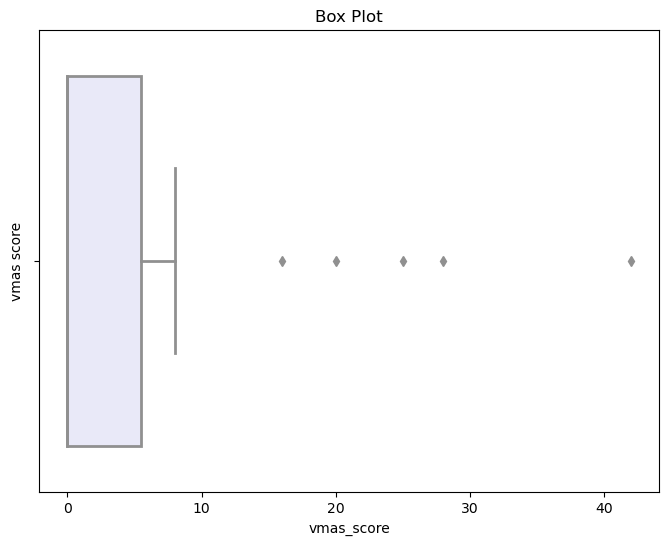

In [263]:
# creating box plot to check for outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=all_scores, x='vmas_score', orient='h', linewidth=2, color='lavender')
plt.title("Box Plot")
plt.ylabel('vmas score')
plt.show()

It looks th  the mean and std are very out of whack and WAY above 0 and 1. This calls for some normalization! Furthermore, the total score will be the sum of all of the seperate scores each artist received. Some of the scales of the scores are much larger compared to the rest and in order to find the total scores, all of the scales need to be the same. 

In [264]:
# copy of all scores df
all_scores_2 = all_scores

all_scores_2

,artist,vmas_score,amas_score,riaa_score,billboard_score
0,Cyndi Lauper,6,0,10,276
1,Sade,0,2,5,118
2,Bruce Hornsby & The Range,0,0,9,244
3,Jody Watley,16,0,8,313
4,Tracy Chapman,2,0,6,4
5,Milli Vanilli,0,0,1,30
6,Mariah Carey,0,54,33,1191
7,Marc Cohn,0,0,2,0
8,Arrested Development,7,4,6,94
9,Toni Braxton,8,21,27,734


I will be using Min-Max Normalization technique since I am dealign with 0 values.

**Min-Max Normalization:**

$$
 \ x = \frac{x-min(x)}{max(x) - min(x)}\
$$

In [265]:
# finding min and max of vmas_score
vmas_min = all_scores_2['vmas_score'].min()
vmas_max = all_scores_2['vmas_score'].max()

In [266]:
# created new df to house all of the normalized scores
all_scores_scaled = all_scores_2

In [267]:
# normalizing the vmas column
all_scores_scaled['vmas_score'] = (all_scores_scaled['vmas_score'] - vmas_min)/(vmas_max - vmas_min)

In [268]:
all_scores_scaled.head()

,artist,vmas_score,amas_score,riaa_score,billboard_score
0,Cyndi Lauper,0.142857,0,10,276
1,Sade,0.000000,2,5,118
2,Bruce Hornsby & The Range,0.000000,0,9,244
3,Jody Watley,0.380952,0,8,313
4,Tracy Chapman,0.047619,0,6,4


In [269]:
# min and max of amas
amas_min = all_scores_2['amas_score'].min()
amas_max = all_scores_2['amas_score'].max()

In [270]:
# normalizing the amas column
all_scores_scaled['amas_score'] = (all_scores_scaled['amas_score'] - amas_min)/(amas_max - amas_min)

In [271]:
all_scores_scaled.head()

,artist,vmas_score,amas_score,riaa_score,billboard_score
0,Cyndi Lauper,0.142857,0.000000,10,276
1,Sade,0.000000,0.037037,5,118
2,Bruce Hornsby & The Range,0.000000,0.000000,9,244
3,Jody Watley,0.380952,0.000000,8,313
4,Tracy Chapman,0.047619,0.000000,6,4


In [272]:
# min and max of riaa
riaa_min = all_scores_2['riaa_score'].min()
riaa_max = all_scores_2['riaa_score'].max()

In [273]:
# normalizing the riaa column
all_scores_scaled['riaa_score'] = (all_scores_scaled['riaa_score'] - riaa_min)/(riaa_max - riaa_min)

In [274]:
all_scores_scaled.head()

,artist,vmas_score,amas_score,riaa_score,billboard_score
0,Cyndi Lauper,0.142857,0.000000,0.070423,276
1,Sade,0.000000,0.037037,0.035211,118
2,Bruce Hornsby & The Range,0.000000,0.000000,0.063380,244
3,Jody Watley,0.380952,0.000000,0.056338,313
4,Tracy Chapman,0.047619,0.000000,0.042254,4


In [275]:
# min and max of billboard
billboard_min = all_scores_2['billboard_score'].min()
billboard_max = all_scores_2['billboard_score'].max()

In [276]:
# normalizing the billboard column
all_scores_scaled['billboard_score'] = (all_scores_scaled['billboard_score'] - billboard_min)/(billboard_max - billboard_min)

In [277]:
all_scores_scaled.head()

,artist,vmas_score,amas_score,riaa_score,billboard_score
0,Cyndi Lauper,0.142857,0.000000,0.070423,0.231738
1,Sade,0.000000,0.037037,0.035211,0.099076
2,Bruce Hornsby & The Range,0.000000,0.000000,0.063380,0.204870
3,Jody Watley,0.380952,0.000000,0.056338,0.262804
4,Tracy Chapman,0.047619,0.000000,0.042254,0.003359


In [278]:
# creating total score column
all_scores_scaled['total_score'] = all_scores_scaled['vmas_score'] + all_scores_scaled['amas_score'] + all_scores_scaled['riaa_score'] + all_scores_scaled['billboard_score']



In [279]:
all_scores_scaled.head()

,artist,vmas_score,amas_score,riaa_score,billboard_score,total_score
0,Cyndi Lauper,0.142857,0.000000,0.070423,0.231738,0.445018
1,Sade,0.000000,0.037037,0.035211,0.099076,0.171325
2,Bruce Hornsby & The Range,0.000000,0.000000,0.063380,0.204870,0.268250
3,Jody Watley,0.380952,0.000000,0.056338,0.262804,0.700095
4,Tracy Chapman,0.047619,0.000000,0.042254,0.003359,0.093231


## New Dateframe

This is the dataframe will be used for modeling. It will include the predictor variables and target variable which will be taken from prior dataframes. These variables include. 

Predictors:
- Gender: artist_info_df (gender)
- Music Group: artist_info_df (need to to dummy variables, music_group)
- Genre: artist_genres_df

Target:
- Total Success Score: all_scores_scaled (total_score)

In [280]:
# dropping the last four winning artists (2019, 2020, 2021, 2022)
best_new_filtered = best_new_df.iloc[:-4].reset_index()
best_new_filtered = best_new_filtered.drop(columns = 'index')

In [281]:
# making sure the last four rows were removed

best_new_filtered

,award_date,artist
0,1985-02-26,Cyndi Lauper
1,1986-02-25,Sade
2,1987-02-24,Bruce Hornsby & The Range
3,1988-03-02,Jody Watley
4,1989-02-22,Tracy Chapman
5,1990-02-21,Milli Vanilli
6,1991-02-20,Mariah Carey
7,1992-02-25,Marc Cohn
8,1993-02-24,Arrested Development
9,1994-03-01,Toni Braxton


In [282]:
# START CITATION 

# link/s below were used to help me generate the following code (merging)

# https://www.geeksforgeeks.org/python-pandas-merging-joining-and-concatenating/

In [283]:
#  artist_info_df 

modeling_merge_1 = pd.merge(best_new_filtered, artist_info_df[['artist','gender', 'music_group']], on = 'artist', how = 'left')

modeling_merge_1.head()

,award_date,artist,gender,music_group
0,1985-02-26,Cyndi Lauper,female,no
1,1986-02-25,Sade,female,no
2,1987-02-24,Bruce Hornsby & The Range,male,yes
3,1988-03-02,Jody Watley,female,no
4,1989-02-22,Tracy Chapman,female,no


In [284]:
# merging artist genre
modeling_merge_2 = pd.merge(modeling_merge_1, artist_genres_df, on = 'artist', how = 'left')

modeling_merge_2.head()

,award_date,artist,gender,music_group,genre
0,1985-02-26,Cyndi Lauper,female,no,"dance pop, new wave pop, permanent wave, soft ..."
1,1986-02-25,Sade,female,no,"british soul, sophisti-pop"
2,1987-02-24,Bruce Hornsby & The Range,male,yes,"album rock, heartland rock, mellow gold, piano..."
3,1988-03-02,Jody Watley,female,no,"contemporary r&b, freestyle, minneapolis sound..."
4,1989-02-22,Tracy Chapman,female,no,"folk, lilith, singer-songwriter, ""womens music"""


In [285]:
# merging the total score to the scaled score df

all_scores_scaled_subset = all_scores_scaled[['artist', 'total_score']]

final_modeling_merge = pd.merge(modeling_merge_2, all_scores_scaled_subset, on = 'artist', how = 'left')

final_modeling_merge

,award_date,artist,gender,music_group,genre,total_score
0,1985-02-26,Cyndi Lauper,female,no,"dance pop, new wave pop, permanent wave, soft ...",0.445018
1,1986-02-25,Sade,female,no,"british soul, sophisti-pop",0.171325
2,1987-02-24,Bruce Hornsby & The Range,male,yes,"album rock, heartland rock, mellow gold, piano...",0.268250
3,1988-03-02,Jody Watley,female,no,"contemporary r&b, freestyle, minneapolis sound...",0.700095
4,1989-02-22,Tracy Chapman,female,no,"folk, lilith, singer-songwriter, ""womens music""",0.093231
5,1990-02-21,Milli Vanilli,male,yes,"freestyle, new jack swing, new wave pop",0.032231
6,1991-02-20,Mariah Carey,female,no,"dance pop, pop, urban contemporary",2.232394
7,1992-02-25,Marc Cohn,male,no,mellow gold,0.014085
8,1993-02-24,Arrested Development,both,yes,"atl hip hop, conscious hip hop, hip hop, old s...",0.361920
9,1994-03-01,Toni Braxton,female,no,"contemporary r&b, dance pop, r&b, urban contem...",1.385795


In [286]:
# END CITATION

In [287]:
final_modeling_merge

,award_date,artist,gender,music_group,genre,total_score
0,1985-02-26,Cyndi Lauper,female,no,"dance pop, new wave pop, permanent wave, soft ...",0.445018
1,1986-02-25,Sade,female,no,"british soul, sophisti-pop",0.171325
2,1987-02-24,Bruce Hornsby & The Range,male,yes,"album rock, heartland rock, mellow gold, piano...",0.268250
3,1988-03-02,Jody Watley,female,no,"contemporary r&b, freestyle, minneapolis sound...",0.700095
4,1989-02-22,Tracy Chapman,female,no,"folk, lilith, singer-songwriter, ""womens music""",0.093231
5,1990-02-21,Milli Vanilli,male,yes,"freestyle, new jack swing, new wave pop",0.032231
6,1991-02-20,Mariah Carey,female,no,"dance pop, pop, urban contemporary",2.232394
7,1992-02-25,Marc Cohn,male,no,mellow gold,0.014085
8,1993-02-24,Arrested Development,both,yes,"atl hip hop, conscious hip hop, hip hop, old s...",0.361920
9,1994-03-01,Toni Braxton,female,no,"contemporary r&b, dance pop, r&b, urban contem...",1.385795


I will also by one hot encoding all of the features in this dataframe. This will help with modeling.

In [288]:
# START CITATION 

# link/s below were used to help me generate the following code (dummy varibales and stripping white spaces)

# https://stackoverflow.com/questions/49420338/pandas-get-dummies-to-create-one-hot-with-separator-and-with-character-lev
# https://stackoverflow.com/questions/21606987/how-can-i-strip-the-whitespace-from-pandas-dataframe-headers

In [289]:
# getting dummy variables for the 'genre' column
genre_dummies = final_modeling_merge['genre'].str.get_dummies(sep = ',')

genre_dummies.columns = genre_dummies.columns.str.strip()

genre_dummies.columns = genre_dummies.columns.str.replace('"', '')


# concatenating the dummy genre columns with the original df
final_modeling_merge = pd.concat([final_modeling_merge, genre_dummies], axis=1)

# dropping the original 'genre' column
final_modeling_merge.drop(columns=['genre'], inplace=True)

final_modeling_merge.head()

,award_date,artist,gender,music_group,total_score,womens music,canadian pop,conscious hip hop,contemporary country,country,...,ectofolk,folk,freestyle,heartland rock,hip pop,lilith,mellow gold,neo soul,pop,pop rap
0,1985-02-26,Cyndi Lauper,female,no,0.445018,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1986-02-25,Sade,female,no,0.171325,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1987-02-24,Bruce Hornsby & The Range,male,yes,0.268250,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1988-03-02,Jody Watley,female,no,0.700095,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1989-02-22,Tracy Chapman,female,no,0.093231,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [290]:
# dropping total score for now while I get dummy variables for the other columns

# creating new df
modeling_df_enc = final_modeling_merge.drop(columns = ['artist','award_date'])

modeling_df_enc = pd.get_dummies(modeling_df_enc).astype(int)

modeling_df_enc = modeling_df_enc.drop(columns = 'total_score')

In [291]:
# END CITATIONS

In [292]:
# stripping the df for apostrophes
modeling_df_enc.columns = modeling_df_enc.columns.str.strip('"')

modeling_df_enc

,womens music,canadian pop,conscious hip hop,contemporary country,country,country dawn,country road,dance pop,eau claire indie,ectofolk,...,lilith,mellow gold,neo soul,pop,pop rap,gender_both,gender_female,gender_male,music_group_no,music_group_yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
7,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
8,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
9,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [293]:
modeling_df_enc.head()

,womens music,canadian pop,conscious hip hop,contemporary country,country,country dawn,country road,dance pop,eau claire indie,ectofolk,...,lilith,mellow gold,neo soul,pop,pop rap,gender_both,gender_female,gender_male,music_group_no,music_group_yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [294]:
# adding back total score column. Renaming to success score
modeling_df_enc['success_score'] = final_modeling_merge['total_score']

In [295]:
modeling_df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 78 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   womens music                34 non-null     int64  
 1   canadian pop                34 non-null     int64  
 2   conscious hip hop           34 non-null     int64  
 3   contemporary country        34 non-null     int64  
 4   country                     34 non-null     int64  
 5   country dawn                34 non-null     int64  
 6   country road                34 non-null     int64  
 7   dance pop                   34 non-null     int64  
 8   eau claire indie            34 non-null     int64  
 9   ectofolk                    34 non-null     int64  
 10  electric bass               34 non-null     int64  
 11  folk                        34 non-null     int64  
 12  freestyle                   34 non-null     int64  
 13  heartland rock              34 non-nu

In [296]:
# checking for missing values
modeling_df_enc.isna().sum().sum()

0

In [297]:
# replacing any spaces in the header to underscores
modeling_df_enc.columns = modeling_df_enc.columns.str.replace(' ', '_')

In [298]:
modeling_df_enc.head()

,womens_music,canadian_pop,conscious_hip_hop,contemporary_country,country,country_dawn,country_road,dance_pop,eau_claire_indie,ectofolk,...,mellow_gold,neo_soul,pop,pop_rap,gender_both,gender_female,gender_male,music_group_no,music_group_yes,success_score
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0.445018
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0.171325
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0.268250
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0.700095
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0.093231


# Modeling 

In this section I will be creating regression models in order to try and predict the success of an artist who wins the Best New Artist Award based of certain features.

In [299]:
# START CITATION

# Linear Regression Resources:
    # https://realpython.com/linear-regression-in-python/
    # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

# Support Vector Regression Resources:
    # https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html 
    # Machine Learning Class, utilized the svm code that was taught and tweaked it to work with svr
    
# Decision Tree Regressor Resources:
    # https://www.geeksforgeeks.org/python-decision-tree-regression-using-sklearn/
    # https://medium.com/@theclickreader/decision-tree-regression-explained-with-implementation-in-python-1e6e48aa7a47
      
# MSE, MAE, R^2 Resource:
    # MSE: From Machine Learning Class
    # MAE = https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
    # R^2 = https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

# Cross Validation Resource:
    # https://www.w3schools.com/python/python_ml_cross_validation.asp
    
# pd.Dataframe():
    # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html
    
# Correlation Matrix:
    # https://stackoverflow.com/questions/65988614/visualizing-a-huge-correlation-matrix-in-python
    # 

In [300]:
# predictors
x = modeling_df_enc.drop(columns = ["success_score"],axis=1)

# target variable
y = modeling_df_enc['success_score']

**Checking for Multicollinearity**

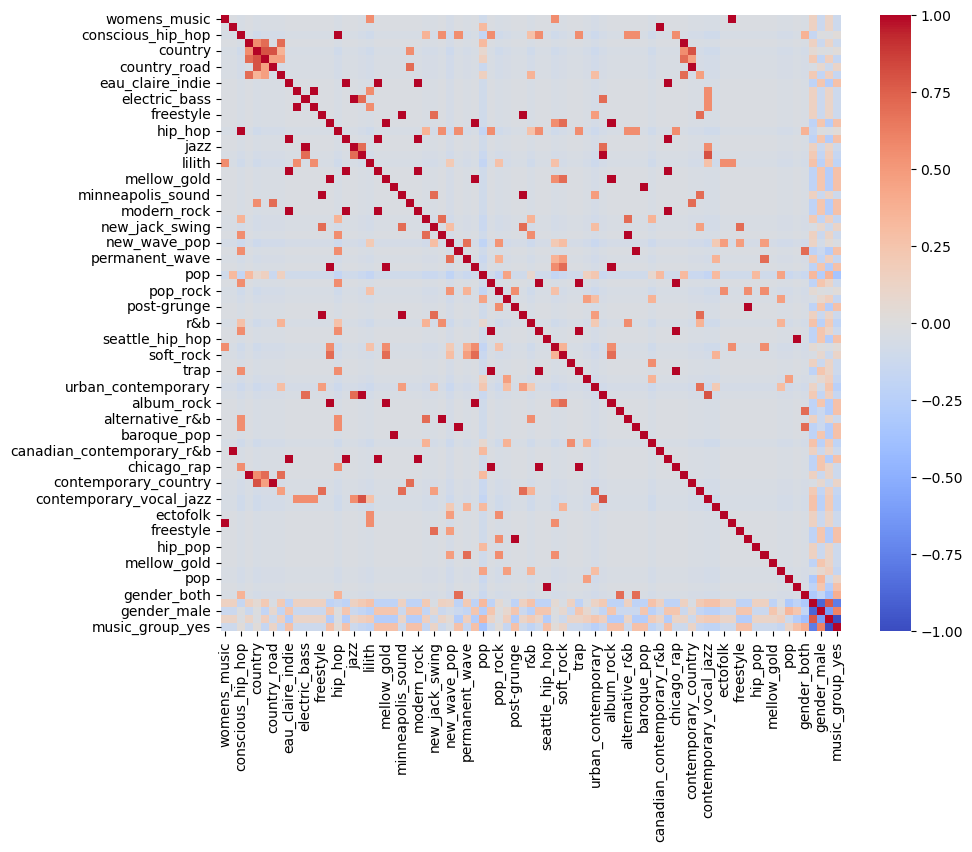

In [431]:
# Correlation Matrix to check for multicollinearity
plt.figure(figsize=(10, 8))
sns.heatmap(x.corr(), cmap='coolwarm', fmt=".2f")
plt.show()

The correlation matrix, while very dense, indicates that there is high multicollinearity throughout the dataset, especially between the gender and music group features. However, due to the limited amount of predictors and observations being used, I will be keeping all of the predictors for the modeling portion of this project. Therefore please be aware that the model's coefficients may not be reliably interpretted.

In [302]:
# standarizing the predictor values
sc = StandardScaler()
X = sc.fit_transform(x)

In [303]:
#70/30 train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42, test_size=0.30)

## Linear Model

In [348]:
# creating linear regression model
linear_model = LinearRegression()

# fitting the model
linear_model.fit(X_train, y_train)
linear_model

# predicting 
y_pred = linear_model.predict(X_test)
y_pred


# evaluating performance
mse = round(mean_squared_error(y_test, y_pred), 3)
mae = round(mean_absolute_error(y_test, y_pred), 3)
r2 = round(r2_score(y_test, y_pred), 3)

# adding performance scores to a df
perform_list = [mse, mae, r2]

linear_results_df = pd.DataFrame(perform_list, columns = ['linear_reg'], index = ['Mean Squared Error', 'Mean Average Error', 'R-squared'])

linear_results_df

,linear_reg
Mean Squared Error,0.634
Mean Average Error,0.592
R-squared,0.062


### Cross Validating the Linear Regression Model 

In [351]:
# performing cross-validation
cv_scores = cross_val_score(linear_model, X, y, cv=5)

print('------------------------------------------------')
print(f'Linear Regression Cross Validation Scores :' )
print('------------------------------------------------')
print("Linear Regression - Cross-Validation MSE Scores:", cv_scores)
print("Linear Regression - Mean Cross-Validation MSE:", cv_scores.mean())

------------------------------------------------
Linear Regression Cross Validation Scores :
------------------------------------------------
Linear Regression - Cross-Validation MSE Scores: [ 0.29034383  0.5295826  -0.28120292  0.3352849  -2.50713868]
Linear Regression - Mean Cross-Validation MSE: -0.3266260559084726


**Explaining this models performance**

MSE: On average the squared difference between the actual and predicted success scores is approximately 0.634. 

MAE: On average the average absolute difference between the actual and predicted success scores is approximately 0.592.

R^2: The proportion of variance in the target variable explained by the model is approximately 0.062. In this case, since the R^2 score is not negative the model does a good job capturing the variance in the target variable well. It performs decently when explaining the variability of the success scores. 

Cross Validated Mean MSE Scores: This model has an average of -0.326 MSE scores. Indicating that this model does not perform well in matching the data.

## Support Vector Regression

In [363]:
# creating the SVR classifier
svr_reg = Pipeline([
        ("scaler", StandardScaler()),
        ("svr", SVR(kernel = 'linear', C = 1)),
    ])

# fitting the SVR classifier
svr_reg.fit(X_train, y_train)

# predicting
y_pred_svr = svr_reg.predict(X_test)

# calculating evaluation metrics
mse_svr = round(mean_squared_error(y_test, y_pred_svr), 3)
mae_svr = round(mean_absolute_error(y_test, y_pred_svr), 3)
r2_svr = round(r2_score(y_test, y_pred_svr), 3)

# adding performance scores to a df
perform_list = [mse_svr, mae_svr, r2_svr]

svr_results_df = pd.DataFrame(perform_list, columns = ['svr_best_reg'], index = ['Mean Squared Error', 'Mean Average Error', 'R-squared'])

svr_results_df

,svr_best_reg
Mean Squared Error,0.584
Mean Average Error,0.556
R-squared,0.135


### Cross Validation - SVR

In [355]:
# Perform cross-validation
cv_scores = cross_val_score(svr_reg, X, y, cv=5)

# Print the cross-validation scores
print('-----------------------------------------------------------')
print(f'Support Vector Regression (SVR) Cross Validation Scores :' )
print('-----------------------------------------------------------')
print("Cross-Validation MSE Scores:", cv_scores)
print("Mean Cross-Validation MSE:", cv_scores.mean())

-----------------------------------------------------------
Support Vector Regression (SVR) Cross Validation Scores :
-----------------------------------------------------------
Cross-Validation MSE Scores: [ 0.28161623  0.67511157 -0.12874835  0.26133296 -2.73991599]
Mean Cross-Validation MSE: -0.3301207143841146


**Explaining this models performance**

MSE: On average the squared difference between the actual and predicted success scores is approximately 0.584. 

MAE: On average the average absolute difference between the actual and predicted success scores is approximately 0.556.

R^2: The proportion of variance in the target variable explained by the model is approximately 0.135. In this case, since the R^2 score is not negative the model does a good job capturing the variance in the target variable well. It performs decently when explaining the variability of the success scores.  

Cross Validated Mean MSE Scores: This model has an average of -0.330 MSE scores. Indicating that this model does not perform well in matching the data.


## Decision Tree Regressor

In [404]:
# creating the regressor
tree_reg = DecisionTreeRegressor(random_state = 42, max_depth = 5)

# fitting the dt to the trainign data
tree_reg.fit(X_train, y_train)

# predicting the target values of the test
y_pred_tree = tree_reg.predict(X_test)

# calculating evaluation metrics
mse_tree = round(mean_squared_error(y_test, y_pred_tree), 3)
mae_tree = round(mean_absolute_error(y_test, y_pred_tree), 3)
r2_tree = round(r2_score(y_test, y_pred_tree), 3)

# adding performance scores to a df
perform_list = [mse_tree, mae_tree, r2_tree]

tree_results_df = pd.DataFrame(perform_list, columns = ['tree_best_reg'], index = ['Mean Squared Error', 'Mean Average Error', 'R-squared'])

tree_results_df

,tree_best_reg
Mean Squared Error,0.567
Mean Average Error,0.510
R-squared,0.161


### Cross Validation - Decision Tree

In [357]:
# Perform cross-validation
cv_scores = cross_val_score(tree_clf, X, y, cv=5)

# Print the cross-validation scores
print('-----------------------------------------------------------')
print(f'Decision Tree Regressor Cross Validation Scores :' )
print('-----------------------------------------------------------')
print("Cross-Validation MSE Scores:", cv_scores)
print("Mean Cross-Validation MSE:", cv_scores.mean())

-----------------------------------------------------------
Decision Tree Regressor Cross Validation Scores :
-----------------------------------------------------------
Cross-Validation MSE Scores: [ 0.28333709  0.65030584 -0.2425916   0.3092701  -3.07962487]
Mean Cross-Validation MSE: -0.4158606875744015


**Explaining this models performance**

MSE: On average the squared difference between the actual and predicted success scores is approximately 0.567. 

MAE: On average the average absolute difference between the actual and predicted success scores is approximately 0.510.

R^2: The proportion of variance in the target variable explained by the model is approximately 0.161. In this casse, since the R^2 score is not negative the model does a good job capturing the variance in the target variable well. It performs decently when explaining the variability of the success scores. 

Cross Validated Mean MSE Scores: This model has an average of -0.416 MSE scores. Indicating that this model does not perform well in matching the data.

In [ ]:
# START CITATION

# Link used for the .join() function: https://www.geeksforgeeks.org/how-to-concatenate-two-or-more-pandas-dataframes/

In [405]:
# combining the model performances into one df

# joining the linear and svr results df
combine_performance = linear_results_df.join(svr_results_df)

# adding tree
combine_performance = combine_performance.join(tree_results_df)

# final joined df
combine_performance

,linear_reg,svr_best_reg,tree_best_reg
Mean Squared Error,0.634,0.584,0.567
Mean Average Error,0.592,0.556,0.510
R-squared,0.062,0.135,0.161


In [ ]:
# END CITATION

## Which model is the best? 

Overall, after observing the performances of each of these regression models, it is safe to say that the Lasso Regression model performs the best out of all of these models. This is due to its relatively low MSE and MAE values, suggesting a better predicitve accuracy compared to the other models, as well as having the highest R-squared value which means it explains more variance in the target variable. However, it is also important to recognize that while this model outperperforms the other four models, its perfomance is not that exceptional. This is most likely due to the very small dataset with a very limited number of observations and features. More data would make this model even stronger. 

### Feature Importances 

Since it was concluded that the Decision Tree Regressor was the the best model compared to the other ones created, let's utilize it to give us the most important features that affects a Best New Artist Winner's chance of success.

In [ ]:
# START CITATION:

# Feature Importance Code taken from Machine Learning Class notes, homework, and in class labs (RCNJ)

In [435]:
# finding the features that are the most significant in the decison tree's predictions

dt_feature_importance = pd.Series(tree_reg.feature_importances_, index = x.columns)

top_5_dt = dt_feature_importance.nlargest(5)

top_5_df = pd.DataFrame(top_5_dt).reset_index()

top_5_df.columns = ['feature', 'importance_score']

top_5_df['feature'] = top_5_df['feature'].str.replace('_', )

TypeError: replace() missing 1 required positional argument: 'repl'

In [434]:
top_10_df

,feature,importance_score
0,dance_pop,0.454065
1,r&b,0.211413
2,country_dawn,0.191364
3,uk_pop,0.093424
4,country,0.037103
5,pop,0.012631
6,womens_music,0.000000
7,canadian_pop,0.000000
8,conscious_hip_hop,0.000000
9,contemporary_country,0.000000
